<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_021_feature_engineering_exploration_marriage_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Highly Predictive Features

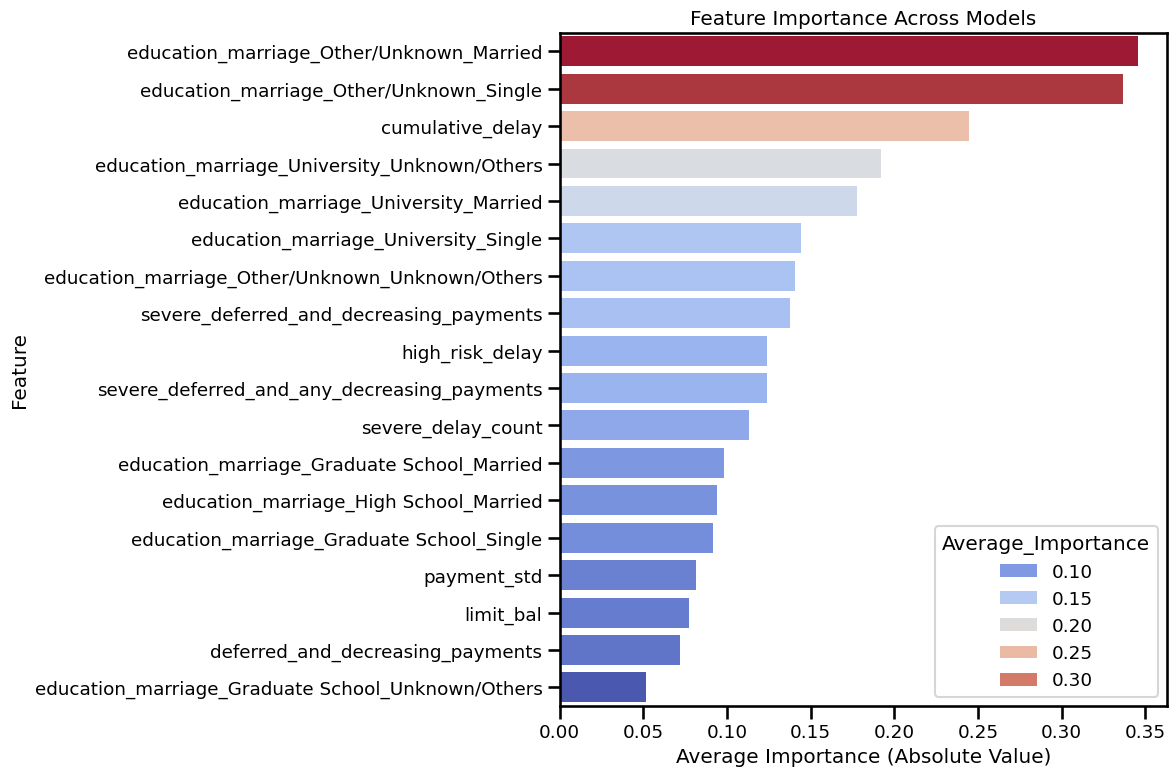

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize an empty DataFrame to store the merged reports
merged_df = pd.DataFrame()

# Loop through each model report and merge them on the 'Feature' column
for model_name, report in selected_features.items():
    # Convert the current report to a DataFrame
    df = pd.DataFrame(report.items(), columns=["Feature", f"{model_name}_Importance"])

    # Merge the current DataFrame with the merged DataFrame
    if merged_df.empty:
        merged_df = df  # If it's the first report, initialize merged_df
    else:
        merged_df = pd.merge(merged_df, df, on="Feature", how="inner")

# print("\nUniversally important features:")
# merged_df['Feature']

# Step 1: Create a new column that calculates the average absolute importance across all models
# Apply abs() to ensure we consider absolute values of importance
merged_df['Average_Importance'] = merged_df.iloc[:, 1:].apply(lambda row: row.abs().mean(), axis=1)

# Step 2: Sort the DataFrame by the new 'Average_Importance' column in descending order
sorted_df = merged_df.sort_values(by='Average_Importance', ascending=False)

# Step 3: (Optional) Save the sorted DataFrame to a new JSON or CSV file for future reference
sorted_df.to_csv('sorted_feature_importance.csv', index=False)

# Step 1: Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Average_Importance',
    y='Feature',
    data=sorted_df, hue="Average_Importance",
    palette='coolwarm'
)

# Step 2: Add labels and title
plt.xlabel('Average Importance (Absolute Value)')
plt.ylabel('Feature')
plt.title('Feature Importance Across Models')

# Step 3: Display the plot
plt.tight_layout()
plt.show()

In [ ]:
education_marriage_columns = sorted_df["Feature"].tolist() + ['education']
print(X_train_processed_df[education_marriage_columns].columns)

Index(['education_marriage_Other/Unknown_Married',
       'education_marriage_Other/Unknown_Single', 'cumulative_delay',
       'education_marriage_University_Unknown/Others',
       'education_marriage_University_Married',
       'education_marriage_University_Single',
       'education_marriage_Other/Unknown_Unknown/Others',
       'severe_deferred_and_decreasing_payments', 'high_risk_delay',
       'severe_deferred_and_any_decreasing_payments', 'severe_delay_count',
       'education_marriage_Graduate School_Married',
       'education_marriage_High School_Married',
       'education_marriage_Graduate School_Single', 'payment_std', 'limit_bal',
       'deferred_and_decreasing_payments',
       'education_marriage_Graduate School_Unknown/Others', 'education'],
      dtype='object')


### Load & Preprocess Data

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

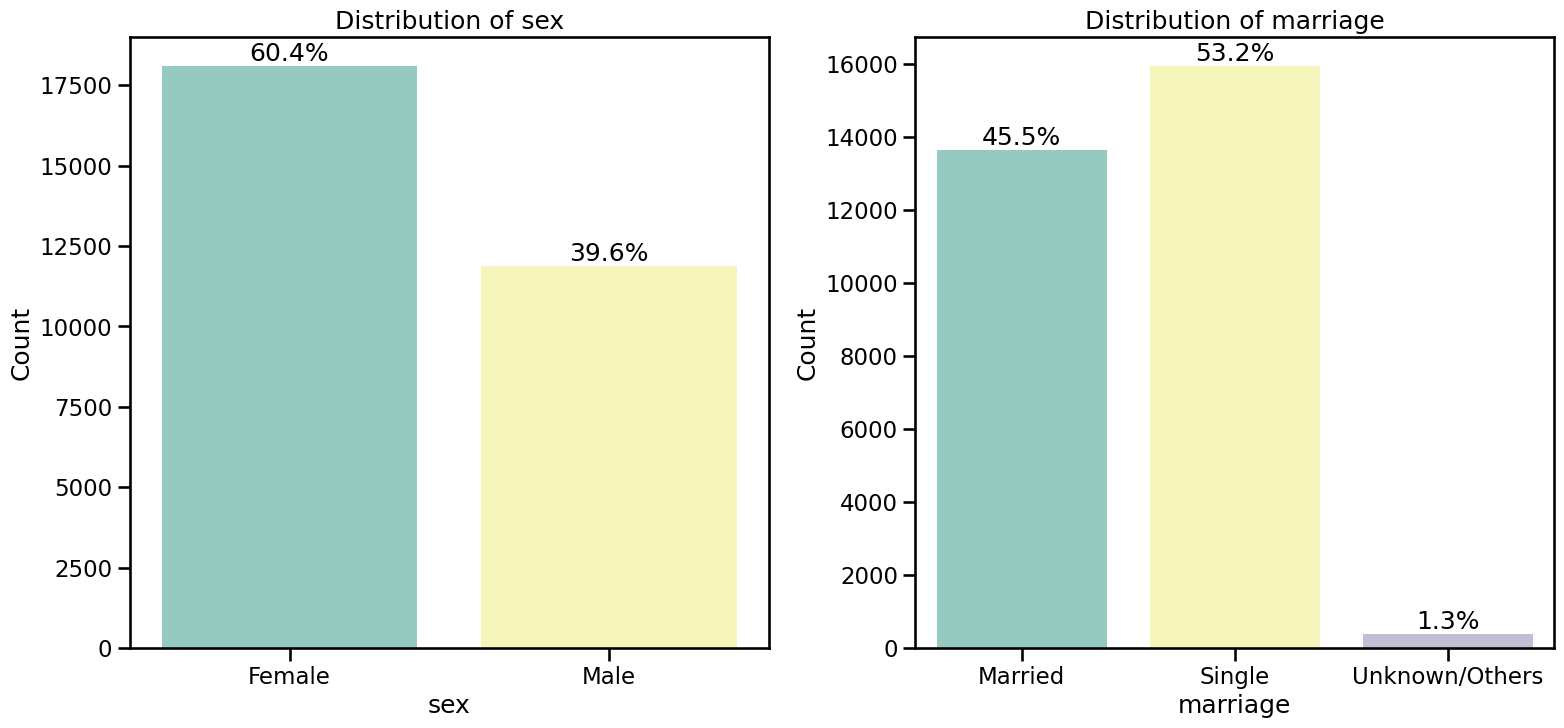

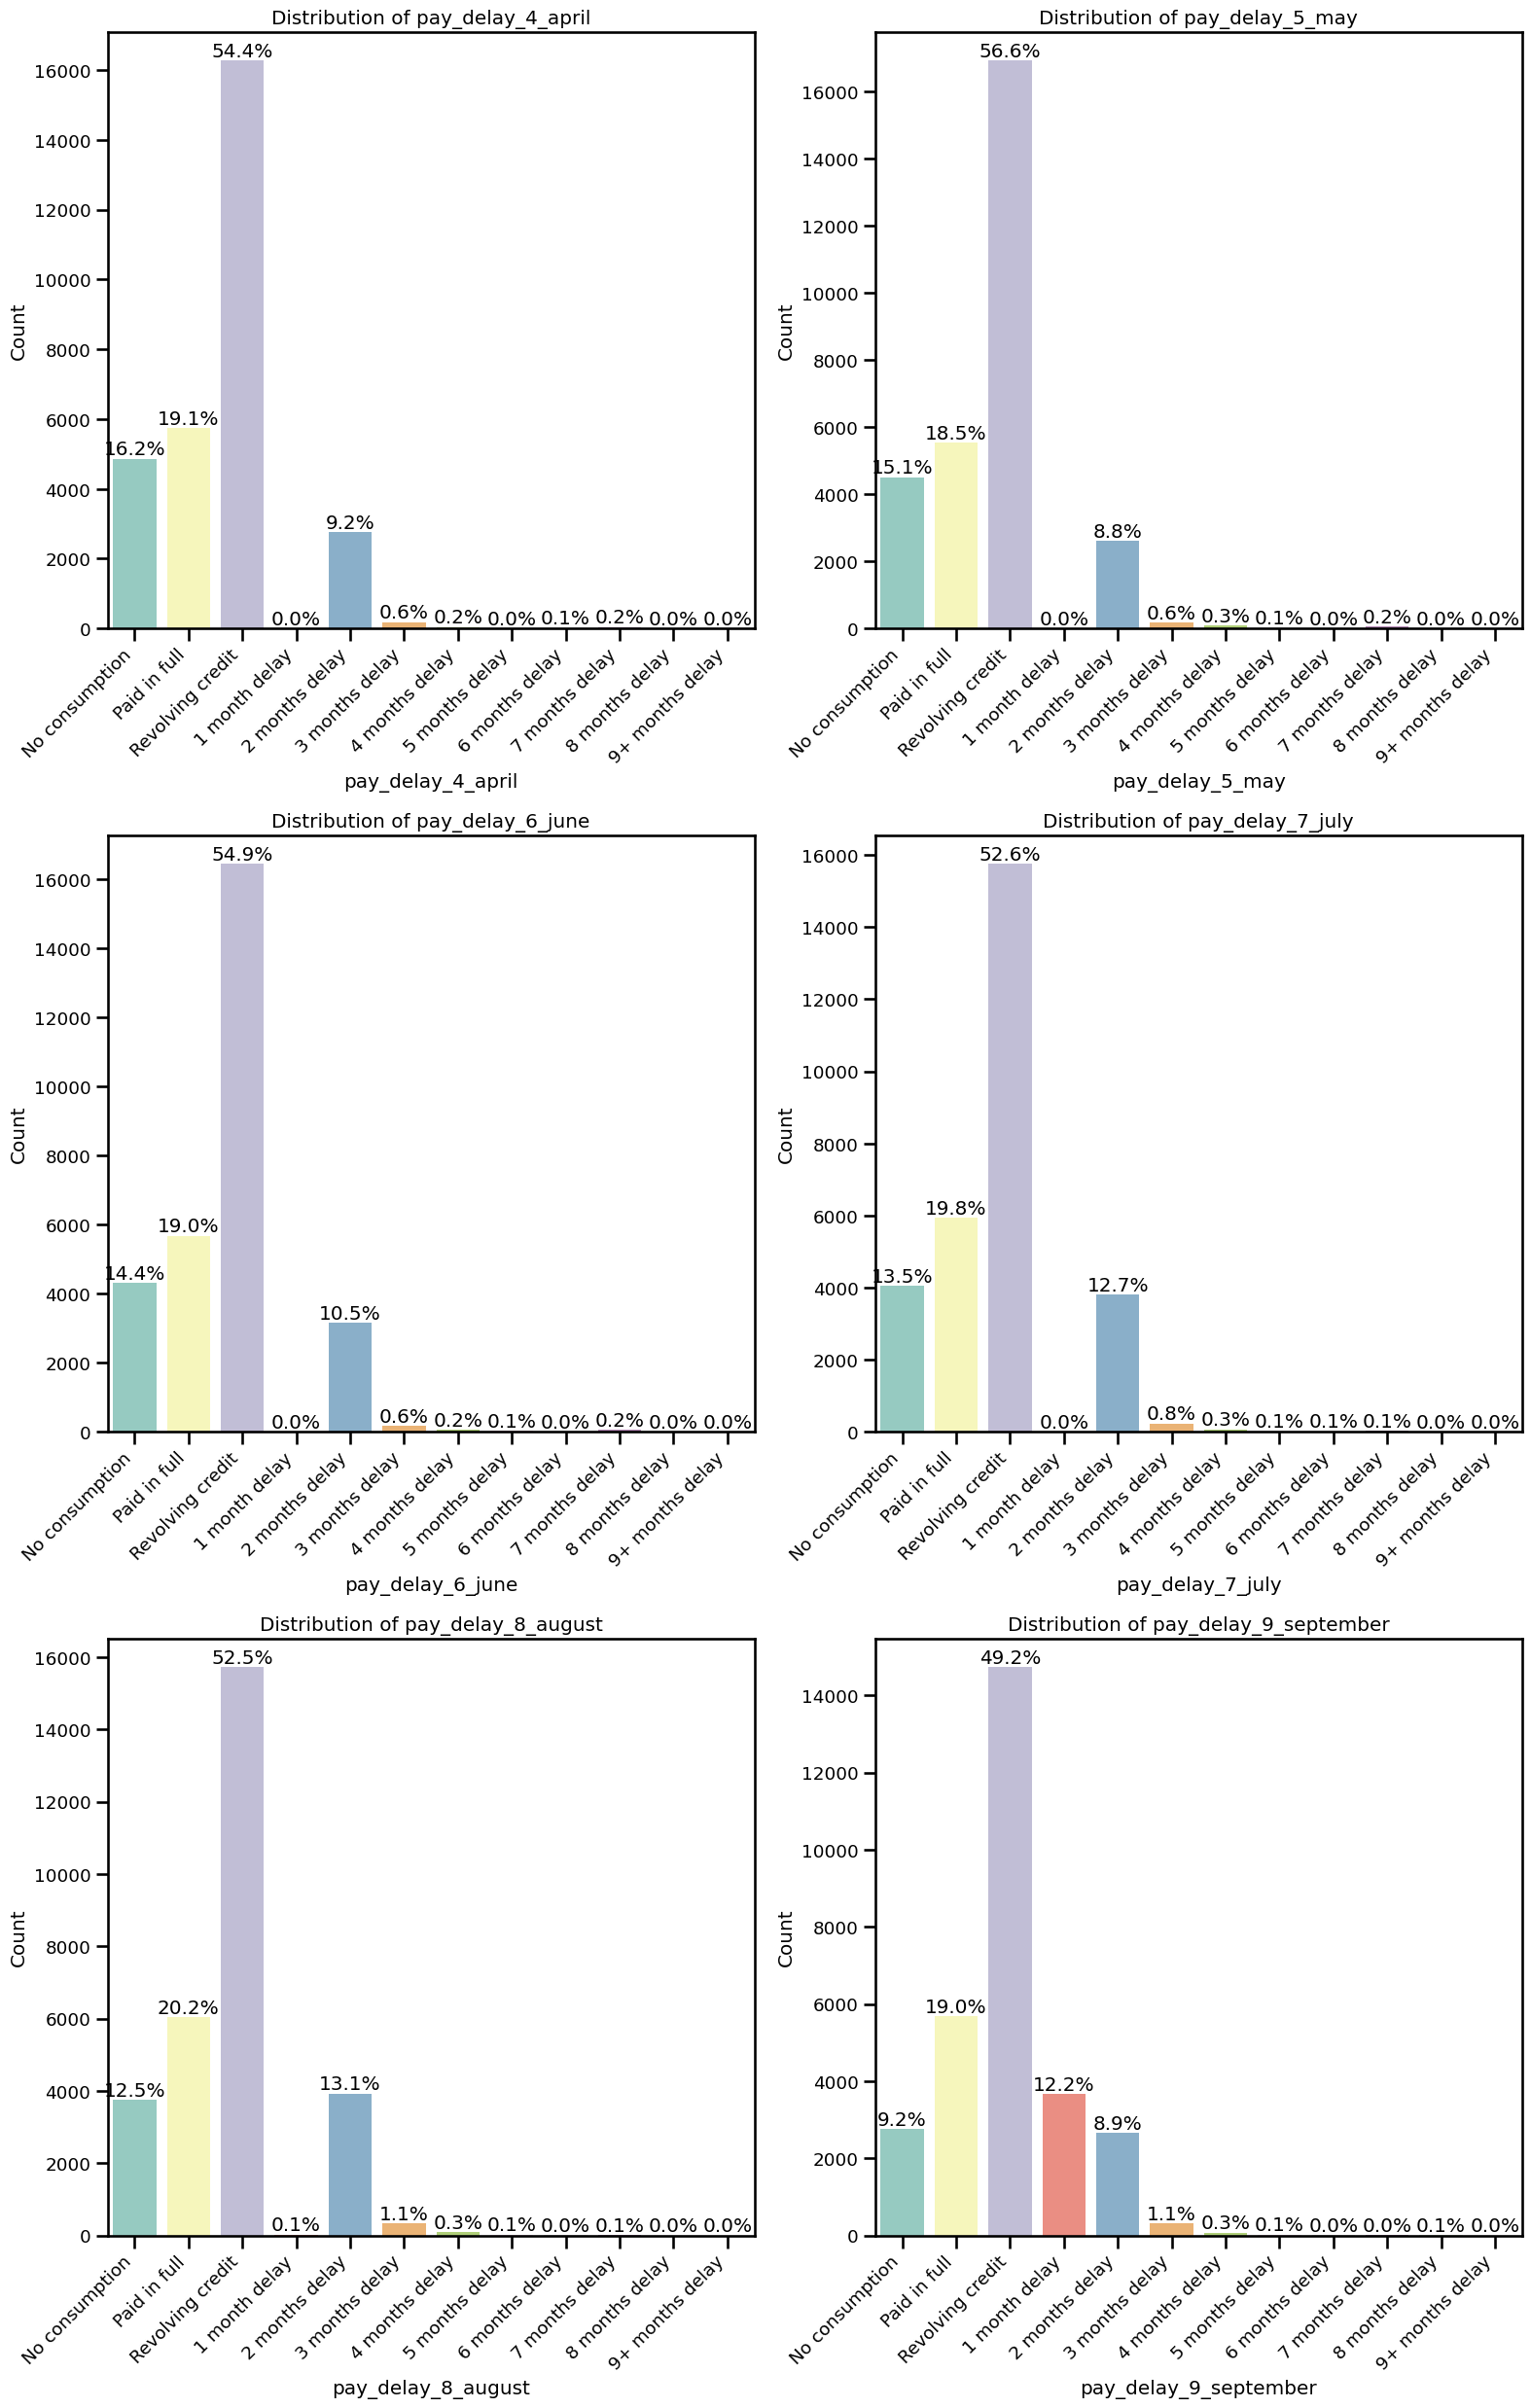

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,load_and_preprocess_data,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column, process_sex_column_cat_codes_one_two,
                             process_marriage_column, process_default_payment_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns, categorical_columns,
                             plot_categorical_distributions, plot_ordinal_distributions)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols + [target])
else:
    print("Error loading and preprocessing data.")

# # Convert Target to Categorical
# df[target] = df[target].cat.codes  # Convert to categorical codes (0, 1)
# # Check the results
# print('Target converted to numeric')
# print(df[target].unique())  # Should output [0, 1]
print(df[target].value_counts())

# visualize the categorical data
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Feature Engineering Opportunities

Based on the significant associations between the `Other/Unknown` categories in both `education` and `marriage` and loan defaults, we can leverage this information to create new features or refine existing ones to improve the predictive performance of your model. Here are some feature engineering strategies that can be applied:

### 1. **Create Binary Flags for "Other/Unknown" Categories**
   - Since `Other/Unknown` categories in `education` and `marriage` are significantly associated with defaults, you can create binary indicator features that specifically capture whether an observation falls into these categories. These features would allow the model to learn if being in the `Other/Unknown` category contributes more to default risk.
   
   ```python
   df['is_education_other_unknown'] = (df['education'] == 'Other/Unknown').astype(int)
   df['is_marriage_other_unknown'] = (df['marriage'] == 'Unknown/Others').astype(int)
   ```

   This binary feature would be `1` if a person is in the `Other/Unknown` category, otherwise `0`. This isolates the effect of these categories and enables the model to treat them differently.

### 2. **Create Risk Ratios for Categories**
   - Given the strong relationship between these categories and defaults, you can calculate the default risk ratio for each category of `education` and `marriage`. This can then be used as a feature to quantify how risky each category is.

   ```python
   # Calculate default rates by category
   education_default_rates = df.groupby('education')['default_payment_next_month'].mean()
   marriage_default_rates = df.groupby('marriage')['default_payment_next_month'].mean()

   # Map the rates back to the dataframe
   df['education_risk_ratio'] = df['education'].map(education_default_rates)
   df['marriage_risk_ratio'] = df['marriage'].map(marriage_default_rates)
   ```

   This way, the model learns from the quantified risk associated with each category rather than relying purely on the raw categorical values.

### 3. **Weight of Evidence (WoE) and Information Value (IV)**
   - Calculate the Weight of Evidence (WoE) and Information Value (IV) for the categories of `education` and `marriage`. These metrics help quantify the predictive power of categorical variables with respect to a binary target like loan defaults.

   ```python
   # WoE and IV require specialized packages or functions, you can calculate them by transforming:
   def calculate_woe_iv(data, feature, target):
       data = data[[feature, target]].copy()
       grouped = data.groupby(feature)[target].agg(['count', 'sum'])
       grouped['non_event'] = grouped['count'] - grouped['sum']
       grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
       grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
       grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
       grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
       iv = grouped['iv'].sum()
       return grouped[['woe']], iv

   woe_education, iv_education = calculate_woe_iv(df, 'education', 'default_payment_next_month')
   woe_marriage, iv_marriage = calculate_woe_iv(df, 'marriage', 'default_payment_next_month')

   # Merge WOE into the original dataframe
   df['education_woe'] = df['education'].map(woe_education['woe'])
   df['marriage_woe'] = df['marriage'].map(woe_marriage['woe'])
   ```

   WoE transforms the categories into numerical values based on their contribution to the target variable, while IV provides insight into the predictive power of each feature.

### 9. **Cluster Analysis for Rare Categories**
   - Consider applying cluster analysis to the `Other/Unknown` categories to see if there are underlying patterns within these categories that could further enhance model performance. This can help break down a potentially heterogeneous group (e.g., people with unknown education or marriage status) into more homogeneous subgroups.


# Target as Numeric

The first issue to address is our target is a categorical data type that needs to be converted to numeric. Simply using the cat codes will reverse the order so we need to rempap the zero to no default and the ones to default.

In [ ]:
# target as numeric conversion
print( df['default_payment_next_month'].cat.codes.value_counts())
# Reverse the category mapping: 1 -> default, 0 -> no default
df['target'] = df['default_payment_next_month'].cat.codes.apply(lambda x: 1 if x == 0 else 0)

# Check the new value counts
print(df['target'].value_counts())

1    23335
0     6630
Name: count, dtype: int64
target
0    23335
1     6630
Name: count, dtype: int64


### Education Marriage Risk Ratios

This function that checks whether the target (`default_payment_next_month`) is numeric. If it’s categorical, the function will make a copy of the DataFrame, convert the target to numeric, and then create the `education_risk_ratio` and `marriage_risk_ratio` features based on the numeric target.

1. **`education_default_rates`**:
   - This calculates the **average default rate** for each category in the `education` column. It groups the data by education level and computes the mean of `default_payment_next_month` (which is assumed to be binary: `1` for default, `0` for no default).
   - For example, if the `education` column has categories like "Graduate School," "High School," and "Other/Unknown," it will calculate the percentage of defaults within each of these categories.

   ```python
   education_default_rates = df.groupby('education')['default_payment_next_month'].mean()
   ```

2. **`marriage_default_rates`**:
   - This works the same way as the `education_default_rates`, but it calculates the default rates for each category in the `marriage` column.

   ```python
   marriage_default_rates = df.groupby('marriage')['default_payment_next_month'].mean()
   ```

3. **`education_risk_ratio` and `marriage_risk_ratio`**:
   - These features are the **mapped default rates** from `education_default_rates` and `marriage_default_rates` back to the original dataset. Each row in the `df` will now contain the average default rate for the corresponding education or marriage category.
   - For example, if someone’s education level is "Graduate School" and the default rate for "Graduate School" is 0.2, their `education_risk_ratio` will be `0.2`.

   ```python
   df['education_risk_ratio'] = df['education'].map(education_default_rates)
   df['marriage_risk_ratio'] = df['marriage'].map(marriage_default_rates)
   ```

### How These Features Work:
- **`education_risk_ratio`**: This feature gives each row in your dataset a **risk ratio** based on their education level, representing the average default rate of people with the same education.
- **`marriage_risk_ratio`**: This feature does the same for the `marriage` category, assigning each row the average default rate for their specific marriage category.

### Why They Might Be Useful:
These features are designed to give the model **category-specific risk information**:
- Instead of treating `education` and `marriage` purely as categorical variables, these features represent the **average default risk** for each group, helping the model understand the historical risk patterns associated with each category.
  
### When They Might Be Helpful:
- **Categorical Encoding**: When working with categorical variables like `education` and `marriage`, models often perform better when those categories are encoded in a way that reflects their relationship with the target variable. Risk ratios like these can serve as a form of **target encoding** or **mean encoding**, which can provide useful signals to the model.
  
- **Information Representation**: Instead of one-hot encoding or label encoding the `education` and `marriage` columns, these risk ratios represent the **probability** that an individual with that education or marriage status will default, which could be highly predictive.

### Why They Might Not Work with a Categorical Target:
If `default_payment_next_month` is categorical (instead of numeric or binary), calculating the **mean** (as done in `groupby('education')['default_payment_next_month'].mean()`) doesn’t make sense because the mean of categorical values is undefined. The mean only works when `default_payment_next_month` is numeric (0 or 1).

Fixing the FutureWarnings:
To handle these warnings, you can pass the observed=True parameter to groupby(). This will exclude the unused categories during the groupby() operation.


In [ ]:
# Filter the dataset to focus on 'Other/Unknown' for education and marriage
print(df[(df['education'] == 'Other/Unknown') | (df['marriage'] == 'Unknown/Others')].shape) # Education OR Marriage
print(df[(df['education'] == 'Other/Unknown') & (df['marriage'] == 'Unknown/Others')].shape) # Education & Marriage

(837, 25)
(8, 25)


In [ ]:
def create_unknown_flags(df):
    # Feature for when either education or marriage is "Other/Unknown"
    df['education_or_marriage_unknown_flag'] = ((df['education'] == 'Other/Unknown') | (df['marriage'] == 'Unknown/Others')).astype(int)

    # Feature for when both education and marriage are "Other/Unknown"
    df['education_and_marriage_unknown_flag'] = ((df['education'] == 'Other/Unknown') & (df['marriage'] == 'Unknown/Others')).astype(int)

    return df

# Apply the function to the DataFrame
df = create_unknown_flags(df)

# Check the shape of the filtered data
print("Rows where education OR marriage is 'Other/Unknown':", df[df['education_or_marriage_unknown_flag'] == 1].shape)
print("Rows where education AND marriage are 'Other/Unknown':", df[df['education_and_marriage_unknown_flag'] == 1].shape)


Rows where education OR marriage is 'Other/Unknown': (837, 27)
Rows where education AND marriage are 'Other/Unknown': (8, 27)


In [ ]:
# Calculate default rates by category
education_default_rates = df.groupby('education', observed=True)['target'].mean()
marriage_default_rates = df.groupby('marriage', observed=True)['target'].mean()

# Map the rates back to the dataframe
df['education_risk_ratio'] = df['education'].map(education_default_rates).astype('float')
df['marriage_risk_ratio'] = df['marriage'].map(marriage_default_rates).astype('float')
# check the data type
df[['education_risk_ratio', 'marriage_risk_ratio']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education_risk_ratio  29965 non-null  float64
 1   marriage_risk_ratio   29965 non-null  float64
dtypes: float64(2)
memory usage: 702.3 KB


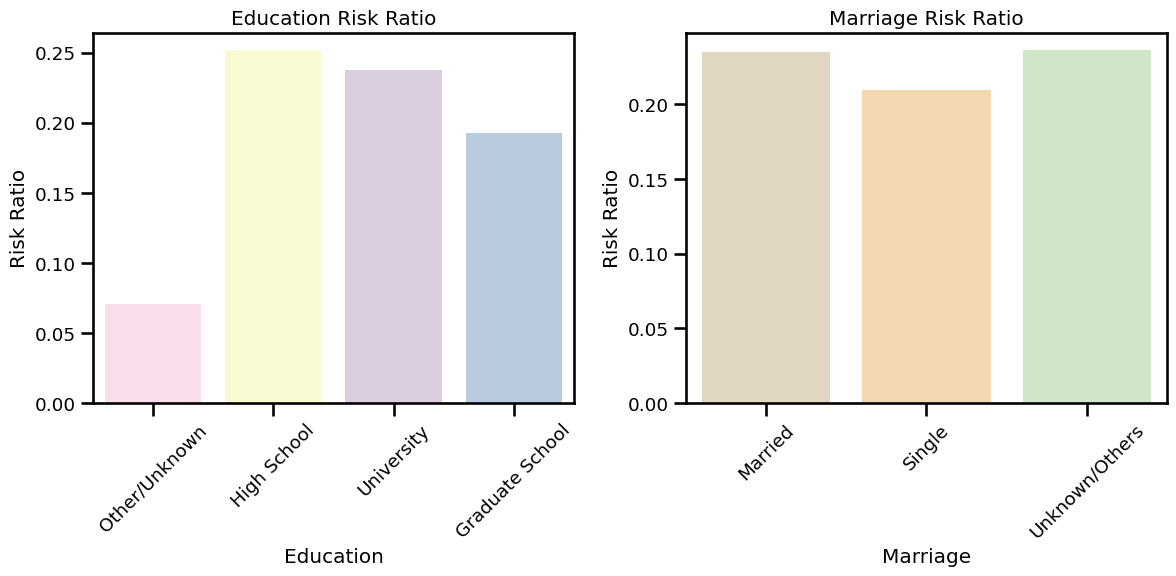

In [ ]:
palette='Pastel1_r'
# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for education risk ratio
sns.barplot(x=df['education'], y=df['education_risk_ratio'], ax=axes[0], hue=df['education'], palette=palette)
axes[0].set_title('Education Risk Ratio')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Risk Ratio')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot for marriage risk ratio
sns.barplot(x=df['marriage'], y=df['marriage_risk_ratio'], ax=axes[1], hue=df['marriage'],palette=palette)
axes[1].set_title('Marriage Risk Ratio')
axes[1].set_xlabel('Marriage')
axes[1].set_ylabel('Risk Ratio')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


####Chi-Square

- **Chi-Square Statistic (`chi2_stat`)**: 160.46
- **P-value**: 1.46e-34 (essentially 0)

#### **Chi-Square Statistic (160.46)**:
The Chi-Square statistic measures the discrepancy between the observed counts and the expected counts (under the assumption that there is no association between education and loan defaults). A larger Chi-Square value suggests a greater difference between the observed and expected values, indicating a stronger relationship between the variables.

- In this case, the **chi2_stat of 160.46** is very large, which suggests that the observed distribution of defaults across different education categories is **significantly different** from what would be expected if there were no association between education and loan defaults.

#### **P-value (1.46e-34)**:
The p-value tells you the probability of observing the data (or more extreme data) if the null hypothesis (no association between education and loan default) is true. A p-value less than 0.05 is typically considered statistically significant.

- Here, the **p-value is 1.46e-34**, which is extremely small (practically 0). This indicates that the difference between the observed and expected counts is highly unlikely to have occurred by random chance.
  
#### **Conclusion**:
- **There is a statistically significant association** between education and loan default status. The very small p-value (1.46e-34) suggests that the relationship between education and loan defaults is real and not due to random variation.
- The large chi-square statistic further confirms that education plays an important role in differentiating between those who default and those who don't.

### Implication:
This result reinforces the earlier findings from the t-tests on WoE and risk ratios, where education was shown to be a strong predictor of loan defaults. The chi-square test supports the idea that the **distribution of loan defaults varies significantly across different education categories**, making education a valuable feature for predicting loan default.

Let me know if you'd like to dive deeper into any aspect of the analysis!

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['education'], df['target'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test for Education: chi2_stat={chi2_stat}, p-value={p_value}')


Chi-Square Test for Education: chi2_stat=160.46034641045537, p-value=1.4580892708563812e-34


### Weight of Evidence (WoE) and Information Value (IV)
Calculate the Weight of Evidence (WoE) and Information Value (IV) for the categories of education and marriage. These metrics help quantify the predictive power of categorical variables with respect to a binary target like loan defaults.

This function, `calculate_woe_iv`, is designed to calculate **Weight of Evidence (WoE)** and **Information Value (IV)** for a given feature with respect to a binary target (e.g., `default_payment_next_month`). These metrics are commonly used in credit scoring and logistic regression to assess the predictive power of categorical variables.

### What the Function is Doing:

1. **Select the relevant columns**:
   ```python
   data = data[[feature, target]].copy()
   ```
   This line creates a copy of the DataFrame containing only the `feature` (e.g., `education`, `marriage`) and `target` (e.g., `default_payment_next_month`).

2. **Group the data by the feature and calculate counts and events**:
   ```python
   grouped = data.groupby(feature)[target].agg(['count', 'sum'])
   ```
   - `groupby(feature)[target]`: Groups the data by the `feature` (e.g., `education`).
   - `.agg(['count', 'sum'])`: Aggregates the counts of occurrences and the sum of the `target` values within each category of the feature.
     - `count`: Total number of records in each category.
     - `sum`: Total number of events (e.g., defaults) in each category of the feature.

3. **Calculate non-events**:
   ```python
   grouped['non_event'] = grouped['count'] - grouped['sum']
   ```
   This calculates the number of **non-events** (e.g., non-defaults) by subtracting the number of events (`sum`) from the total count.

4. **Calculate event and non-event rates**:
   ```python
   grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
   grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
   ```
   - `event_rate`: Proportion of events (e.g., defaults) in each category relative to the total number of events.
   - `non_event_rate`: Proportion of non-events (e.g., non-defaults) in each category relative to the total number of non-events.

5. **Calculate Weight of Evidence (WoE)**:
   ```python
   grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
   ```
   WoE is the natural logarithm of the ratio between the event rate and the non-event rate. It tells you how each category of the feature compares to the overall event/non-event distribution. Positive WoE values indicate a higher likelihood of default (event), and negative values indicate a lower likelihood.

6. **Calculate Information Value (IV)**:
   ```python
   grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
   ```
   The Information Value (IV) measures the predictive power of the feature. It is calculated by multiplying the difference between the event and non-event rates by the WoE for each category. The IV is then summed across all categories of the feature:
   - **IV < 0.02**: Not useful for prediction.
   - **0.02 < IV < 0.1**: Weak predictive power.
   - **0.1 < IV < 0.3**: Medium predictive power.
   - **IV > 0.3**: Strong predictive power.

7. **Return WoE and IV**:
   ```python
   iv = grouped['iv'].sum()
   return grouped[['woe']], iv
   ```
   - The function returns two things:
     - `grouped[['woe']]`: A DataFrame containing the WoE values for each category of the feature.
     - `iv`: The total Information Value (IV) for the feature.

### Example of Using the Function:

1. **Calculate WoE and IV for `education`**:
   ```python
   woe_education, iv_education = calculate_woe_iv(df, 'education', 'default_payment_next_month')
   ```

2. **Calculate WoE and IV for `marriage`**:
   ```python
   woe_marriage, iv_marriage = calculate_woe_iv(df, 'marriage', 'default_payment_next_month')
   ```

### Merging WoE into the Original DataFrame:

```python
df['education_woe'] = df['education'].map(woe_education['woe'])
df['marriage_woe'] = df['marriage'].map(woe_marriage['woe'])
```

- **`map()`**: This maps the WoE values from the calculated DataFrame (`woe_education['woe']`, `woe_marriage['woe']`) back to the original DataFrame (`df`) for each corresponding category of the `education` and `marriage` columns.

### Summary of What WoE and IV Are:

- **Weight of Evidence (WoE)**: Measures how strongly a category of a feature correlates with the target (e.g., loan default). Positive values indicate a higher likelihood of the event (e.g., default), and negative values indicate a lower likelihood.
  
- **Information Value (IV)**: Provides an overall score for how predictive a feature is. Higher IV means the feature has stronger predictive power.

### When They Are Useful:
- WoE and IV are especially useful in credit scoring and logistic regression models because they provide interpretable metrics for the impact of categorical variables on the target. IV can help you select the most predictive features.


In [ ]:
def calculate_woe_iv(data, feature, target):
    data = data[[feature, target]].copy()

    # Group by the feature and calculate counts and sums (events)
    grouped = data.groupby(feature, observed=True)[target].agg(['count', 'sum'])

    # Calculate non-events and rates
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
    grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()

    # Calculate WoE and IV
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

    iv = grouped['iv'].sum()  # Total IV for the feature

    return grouped[['woe', 'iv']], iv

# Example usage:
woe_iv_education, iv_education = calculate_woe_iv(df, 'education', 'target')
woe_iv_marriage, iv_marriage = calculate_woe_iv(df, 'marriage', 'target')

# Merge WoE and IV into the original dataframe
df['education_woe'] = df['education'].map(woe_iv_education['woe']).astype(float)
df['education_iv'] = df['education'].map(woe_iv_education['iv']).astype(float)
df['marriage_woe'] = df['marriage'].map(woe_iv_marriage['woe']).astype(float)
df['marriage_iv'] = df['marriage'].map(woe_iv_marriage['iv']).astype(float)

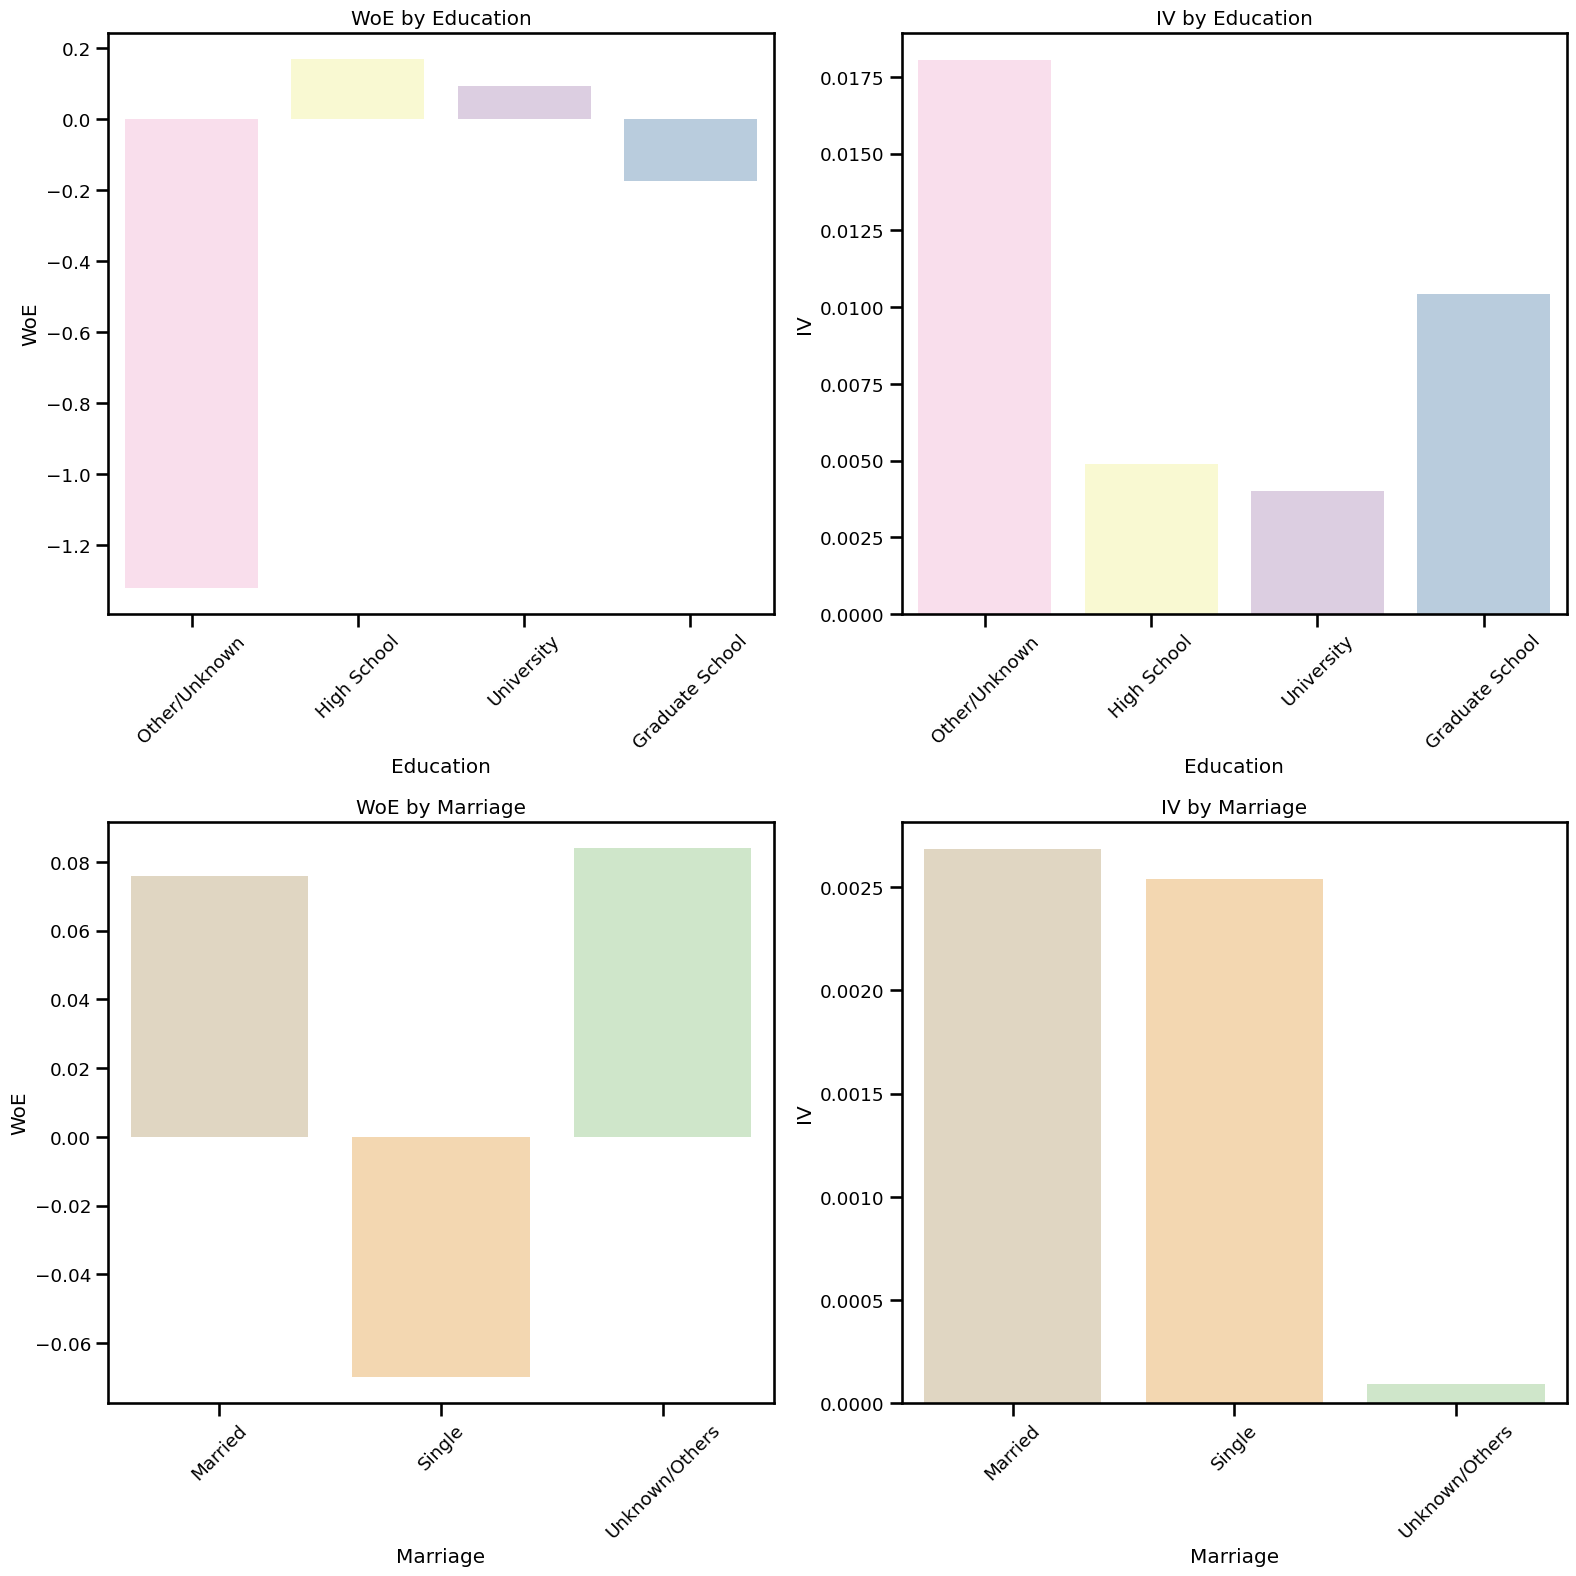

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = 'Pastel1_r'

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # 2 rows, 2 columns

# Plot WoE for Education
sns.barplot(x=df['education'], y=df['education_woe'], ax=axes[0, 0], hue=df['education'], palette=palette)
axes[0, 0].set_title('WoE by Education')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('WoE')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot IV for Education
sns.barplot(x=df['education'], y=df['education_iv'], ax=axes[0, 1], hue=df['education'], palette=palette)
axes[0, 1].set_title('IV by Education')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('IV')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot WoE for Marriage
sns.barplot(x=df['marriage'], y=df['marriage_woe'], ax=axes[1, 0], hue=df['marriage'], palette=palette)
axes[1, 0].set_title('WoE by Marriage')
axes[1, 0].set_xlabel('Marriage')
axes[1, 0].set_ylabel('WoE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot IV for Marriage
sns.barplot(x=df['marriage'], y=df['marriage_iv'], ax=axes[1, 1], hue=df['marriage'], palette=palette)
axes[1, 1].set_title('IV by Marriage')
axes[1, 1].set_xlabel('Marriage')
axes[1, 1].set_ylabel('IV')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df[['education_woe', 'education_iv', 'marriage_woe', 'marriage_iv']].describe()

,education_woe,education_iv,marriage_woe,marriage_iv
count,29965.000000,29965.000000,29965.000000,29965.000000
mean,-0.012395,0.006628,-0.001479,0.002575
std,0.215894,0.003292,0.072839,0.000289
min,-1.320489,0.004000,-0.069773,0.000091
25%,-0.176336,0.004000,-0.069773,0.002540
50%,0.091319,0.004884,-0.069773,0.002540
75%,0.091319,0.010422,0.075977,0.002684
max,0.168670,0.018043,0.084025,0.002684


#### Summary of WOE & IV

#### **Weight of Evidence (WoE)**:
- **Education WoE**: The WoE values for the education feature range from -1.32 to 0.17.
- **Marriage WoE**: The WoE values for the marriage feature range from -0.07 to 0.08.

The **mean** WoE for education is slightly negative (-0.012), while for marriage it is very close to 0 (-0.001), indicating that, on average, neither feature has a strong tendency towards event (e.g., default) or non-event (no default) across all categories.

#### **Information Value (IV)**:
- **Education IV**: The IV values for education range from 0.004 to 0.018, with an average of 0.0066.
- **Marriage IV**: The IV values for marriage range from 0.00009 to 0.00268, with an average of 0.00257.

These IV values are quite small, indicating that both education and marriage have **low predictive power** for differentiating between defaults and non-defaults.

### Interpretation of Positive and Negative WoE Values:

1. **Positive WoE**:
   - Positive WoE values indicate that a particular category is **more strongly associated with events** (e.g., loan defaults) than non-events.
   - For instance, education categories with positive WoE (like the upper quartile of education) are associated with a higher probability of default.

2. **Negative WoE**:
   - Negative WoE values suggest that a particular category is **more strongly associated with non-events** (e.g., no loan default).
   - For example, categories with negative WoE (like the lower quartile of marriage) are associated with a lower likelihood of default.

### Key Insights:
- **WoE for Education**: The range for WoE (-1.32 to 0.17) suggests that certain education categories are more likely to be associated with non-events (negative values), while others have a moderate association with events (positive values). A WoE as low as -1.32 means that some education categories are significantly linked to fewer defaults.
  
- **WoE for Marriage**: The WoE range for marriage is smaller (-0.07 to 0.08), indicating that marriage categories are less impactful in differentiating between defaults and non-defaults compared to education.

### **Information Value (IV)** Interpretation:
- **IV for Education**: With a mean of 0.0066 and a maximum of 0.018, education has **low predictive power**. In general, an IV below 0.1 is considered to have little to no predictive power.
- **IV for Marriage**: The IV for marriage is even lower, with a mean of 0.00257 and a maximum of 0.00268, further confirming that marriage categories provide **very little predictive value**.

The **WoE** and **IV** values you calculated for **education** and **marriage** are indeed quite low, suggesting that these features have **limited predictive power** in distinguishing between loan defaults and non-defaults. Here's how you can interpret the usefulness of these features based on their **Information Value (IV)** scores:

### Information Value (IV) Guidelines:
The IV of a feature gives a sense of how well it can predict the target variable. The general interpretation of IV values is as follows:

- **IV < 0.02**: **Not Predictive** – The feature has little to no predictive power.
- **0.02 ≤ IV < 0.1**: **Weak Predictive Power** – The feature contributes some predictive power but is not particularly strong.
- **0.1 ≤ IV < 0.3**: **Medium Predictive Power** – The feature has moderate predictive power and is valuable for modeling.
- **0.3 ≤ IV < 0.5**: **Strong Predictive Power** – The feature is highly predictive and valuable.
- **IV ≥ 0.5**: **Very Strong Predictive Power** – The feature is very useful and strongly differentiates between events and non-events.

### Analysis of Your IV Values:
- **Education IV**: The IV values for education range from **0.004 to 0.018** with an average of **0.0066**. This falls into the **"Not Predictive"** range, meaning that the education feature, as represented by its categories, provides little to no predictive power.
  
- **Marriage IV**: The IV values for marriage are even lower, ranging from **0.00009 to 0.00268** with an average of **0.00257**. This also falls into the **"Not Predictive"** range, indicating that marriage is not useful for predictive modeling in this context.

### Conclusion:
At these low IV levels, both **education** and **marriage** are unlikely to significantly improve the model's performance. Since both features have **IV < 0.02**, they have very limited utility for feature engineering in this case.

### When Do Features Become Valuable?
- **A feature becomes valuable when its IV crosses the 0.02 threshold**, entering into the range of **weak predictive power**. However, features with **IV ≥ 0.1** are generally considered **moderately valuable** and should be prioritized for inclusion in feature engineering or modeling.
- In your case, since both education and marriage are below this threshold, they might not provide enough value to justify their inclusion, at least in their current form.


#### Statistical Tests

Here's a clarification of when to apply the correct statistical test based on the types of variables you're working with:

### 1. **T-Test**:
   - **When to use**:
     - **Dependent variable (target)**: **Binary categorical** (two categories, e.g., default vs. no default).
     - **Independent variable (feature)**: **Numeric** (continuous values).
   - **Purpose**: Compare the means of two groups (e.g., the mean `WoE` for default vs. no default groups).

   **Example**: Compare `education_woe` (numeric) between loan defaulters (target = 1) and non-defaulters (target = 0).

### 2. **Chi-Square Test**:
   - **When to use**:
     - **Both variables**: **Categorical** (e.g., gender, education level, etc.).
   - **Purpose**: Test for an association between two categorical variables by comparing observed frequencies to expected frequencies.
   
   **Example**: Test the relationship between `education` (categorical) and `default_payment_next_month` (categorical).

### 3. **ANOVA (Analysis of Variance)**:
   - **When to use**:
     - **Dependent variable (target)**: **Numeric** (continuous values, such as a score or amount).
     - **Independent variable (feature)**: **Categorical** with more than two groups.
   - **Purpose**: Compare the means of more than two groups (e.g., compare average loan amount across different education levels).

   **Example**: Compare the mean loan amount (numeric) across different education categories (categorical: High School, University, Graduate School).

### Summary:
- **T-Test**: Numeric feature vs. Binary categorical target (e.g., WoE values vs. default/no default).
- **Chi-Square**: Categorical feature vs. Categorical target (e.g., education level vs. default status).
- **ANOVA**: Numeric target vs. Categorical feature with more than two categories (e.g., loan amount vs. education level).


In [ ]:
from scipy.stats import ttest_ind

def run_ttest_for_woe_and_iv(df, target_col):
    # Initialize results list
    results = []

    # Education WoE
    t_stat_education_woe, p_value_education_woe = ttest_ind(df[df[target_col] == 1]['education_woe'],
                                                            df[df[target_col] == 0]['education_woe'],
                                                            nan_policy='omit')
    results.append(('education_woe', t_stat_education_woe, p_value_education_woe))

    # Marriage WoE
    t_stat_marriage_woe, p_value_marriage_woe = ttest_ind(df[df[target_col] == 1]['marriage_woe'],
                                                          df[df[target_col] == 0]['marriage_woe'],
                                                          nan_policy='omit')
    results.append(('marriage_woe', t_stat_marriage_woe, p_value_marriage_woe))

    # Education IV
    t_stat_education_iv, p_value_education_iv = ttest_ind(df[df[target_col] == 1]['education_iv'],
                                                          df[df[target_col] == 0]['education_iv'],
                                                          nan_policy='omit')
    results.append(('education_iv', t_stat_education_iv, p_value_education_iv))

    # Marriage IV
    t_stat_marriage_iv, p_value_marriage_iv = ttest_ind(df[df[target_col] == 1]['marriage_iv'],
                                                        df[df[target_col] == 0]['marriage_iv'],
                                                        nan_policy='omit')
    results.append(('marriage_iv', t_stat_marriage_iv, p_value_marriage_iv))

    # Return results
    return results

# Run the t-tests
ttest_results = run_ttest_for_woe_and_iv(df, 'target')

# Display the results
for result in ttest_results:
    print(f"Feature: {result[0]}, t-statistic: {result[1]}, p-value: {result[2]}")

    # Check if the p-value is significant
    if result[2] < 0.05:
        print(f"{result[0]} is statistically significant (p < 0.05).")
    else:
        print(f"{result[0]} is not statistically significant (p >= 0.05).")


Feature: education_woe, t-statistic: 12.462970776901006, p-value: 1.4563745379635752e-35
education_woe is statistically significant (p < 0.05).
Feature: marriage_woe, t-statistic: 5.245201306485975, p-value: 1.5717130343953393e-07
marriage_woe is statistically significant (p < 0.05).
Feature: education_iv, t-statistic: -11.940971555885824, p-value: 8.590954086646416e-33
education_iv is statistically significant (p < 0.05).
Feature: marriage_iv, t-statistic: 0.6022019702248611, p-value: 0.5470442612747306
marriage_iv is not statistically significant (p >= 0.05).


#### T-Test

#### **Feature: `education_woe`**
- **T-statistic**: 12.46
  - The **t-statistic** of 12.46 indicates a substantial difference in the mean `education_woe` values between the two groups (loan defaulters and non-defaulters).
  - A higher t-statistic indicates that the difference in means is large relative to the variability within each group.

- **P-value**: \(1.46 \times 10^{-35}\)
  - The **p-value** is extremely small, essentially zero, which means that there is an **extremely low probability** that the observed difference in `education_woe` between defaulters and non-defaulters occurred by random chance.
  - **Conclusion**: Since the p-value is far below the standard threshold of 0.05, the result is highly statistically significant. This means that the `education_woe` feature has a **strong, statistically significant** relationship with loan defaults.

#### **Feature: `marriage_woe`**
- **T-statistic**: 5.25
  - The **t-statistic** of 5.25 suggests a noticeable difference in the mean `marriage_woe` values between the two groups (loan defaulters and non-defaulters).
  - Although this t-statistic is lower than that of `education_woe`, it still represents a substantial difference.

- **P-value**: \(1.57 \times 10^{-7}\)
  - The **p-value** is also extremely small, indicating a very low probability that the difference in `marriage_woe` between the two groups is due to chance.
  - **Conclusion**: Since the p-value is much smaller than 0.05, the result is also statistically significant. This means that the `marriage_woe` feature has a **statistically significant** relationship with loan defaults, though its effect is less pronounced than that of `education_woe`.

### Overall Summary:
- Both **`education_woe`** and **`marriage_woe`** are statistically significant predictors of loan default.
- **`education_woe`** has a larger t-statistic and thus seems to have a **stronger effect** in distinguishing between loan defaulters and non-defaulters compared to `marriage_woe`.

These results suggest that both features can be important in a predictive model for loan defaults, with `education_woe` being particularly impactful. Would you like to proceed with further analysis or use these features in a model?

In [ ]:
from scipy.stats import shapiro

def test_normality(df, columns):
    # Initialize results list
    results = []

    # Iterate over the columns and test for normality
    for col in columns:
        stat, p_value = shapiro(df[col].dropna())  # Drop NA values before the test
        results.append((col, stat, p_value))

    # Return the results
    return results

# List of columns to test
columns_to_test = ['education_woe', 'marriage_woe', 'education_iv', 'marriage_iv']

# Run normality tests
normality_results = test_normality(df, columns_to_test)

# Display the results
for result in normality_results:
    print(f"Feature: {result[0]}, Shapiro-Wilk statistic: {result[1]}, p-value: {result[2]}")

    # Check if the p-value is significant
    if result[2] < 0.05:
        print(f"{result[0]} is not normally distributed (p < 0.05).")
    else:
        print(f"{result[0]} is normally distributed (p >= 0.05).")


Feature: education_woe, Shapiro-Wilk statistic: 0.583233977740254, p-value: 2.500352945996661e-122
education_woe is not normally distributed (p < 0.05).
Feature: marriage_woe, Shapiro-Wilk statistic: 0.6388807544658522, p-value: 2.445142540535515e-118
marriage_woe is not normally distributed (p < 0.05).
Feature: education_iv, Shapiro-Wilk statistic: 0.6915269498345108, p-value: 4.9889236493397045e-114
education_iv is not normally distributed (p < 0.05).
Feature: marriage_iv, Shapiro-Wilk statistic: 0.22314797824615318, p-value: 1.9027646623860138e-140
marriage_iv is not normally distributed (p < 0.05).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29965.
  res = hypotest_fun_out(*samples, **kwds)


#### Test for Normality

Given that all of the **Shapiro-Wilk p-values** are extremely low (well below 0.05), we can conclude that none of the features (**education_woe**, **marriage_woe**, **education_iv**, **marriage_iv**) are normally distributed. This means you should use **non-parametric tests** instead of a t-test, which assumes normality.

### What Non-Parametric Test to Use:
The appropriate non-parametric test to use here is the **Mann-Whitney U test**, which compares two independent samples when the data is not normally distributed.


### Explanation:
- **Mann-Whitney U test**: This test compares two independent samples (e.g., default vs. no default) without assuming that the data is normally distributed. The `alternative='two-sided'` argument ensures that we are performing a two-tailed test, checking for any significant difference in the distribution of the WoE and IV values between the two groups.
  
  


In [ ]:
from scipy.stats import mannwhitneyu

def run_mannwhitney_for_woe_and_iv(df, target_col):
    # Initialize results list
    results = []

    # Education WoE
    stat_education_woe, p_value_education_woe = mannwhitneyu(df[df[target_col] == 1]['education_woe'],
                                                             df[df[target_col] == 0]['education_woe'],
                                                             alternative='two-sided')
    results.append(('education_woe', stat_education_woe, p_value_education_woe))

    # Marriage WoE
    stat_marriage_woe, p_value_marriage_woe = mannwhitneyu(df[df[target_col] == 1]['marriage_woe'],
                                                           df[df[target_col] == 0]['marriage_woe'],
                                                           alternative='two-sided')
    results.append(('marriage_woe', stat_marriage_woe, p_value_marriage_woe))

    # Education IV
    stat_education_iv, p_value_education_iv = mannwhitneyu(df[df[target_col] == 1]['education_iv'],
                                                           df[df[target_col] == 0]['education_iv'],
                                                           alternative='two-sided')
    results.append(('education_iv', stat_education_iv, p_value_education_iv))

    # Marriage IV
    stat_marriage_iv, p_value_marriage_iv = mannwhitneyu(df[df[target_col] == 1]['marriage_iv'],
                                                         df[df[target_col] == 0]['marriage_iv'],
                                                         alternative='two-sided')
    results.append(('marriage_iv', stat_marriage_iv, p_value_marriage_iv))

    # Return results
    return results

# Run the Mann-Whitney U tests
mannwhitney_results = run_mannwhitney_for_woe_and_iv(df, 'target')

# Display the results
for result in mannwhitney_results:
    print(f"Feature: {result[0]}, U-statistic: {result[1]}, p-value: {result[2]}")

    # Check if the p-value is significant
    if result[2] < 0.05:
        print(f"{result[0]} is statistically significant (p < 0.05).")
    else:
        print(f"{result[0]} is not statistically significant (p >= 0.05).")


Feature: education_woe, U-statistic: 83777817.5, p-value: 3.589404660696488e-29
education_woe is statistically significant (p < 0.05).
Feature: marriage_woe, U-statistic: 80175375.0, p-value: 1.7761206076564594e-07
marriage_woe is statistically significant (p < 0.05).
Feature: education_iv, U-statistic: 71917615.5, p-value: 2.2476950627767947e-21
education_iv is statistically significant (p < 0.05).
Feature: marriage_iv, U-statistic: 80008000.0, p-value: 9.040870200704666e-07
marriage_iv is statistically significant (p < 0.05).


#### Mann-Whitney U Test

The results of the **Mann-Whitney U test** show that all four features (**education_woe**, **marriage_woe**, **education_iv**, and **marriage_iv**) are statistically significant, as their **p-values** are well below 0.05. Here's what this means:

### Interpretation of Results:
1. **Education WoE**:
   - **U-statistic**: 83,777,817.5
   - **p-value**: 3.59e-29
   - **Interpretation**: There is a statistically significant difference in the **WoE values for education** between the two groups (default vs. no default). This suggests that education has a significant impact on predicting loan defaults.

2. **Marriage WoE**:
   - **U-statistic**: 80,175,375.0
   - **p-value**: 1.78e-07
   - **Interpretation**: There is a statistically significant difference in the **WoE values for marriage** between the two groups. This indicates that marriage is also a relevant factor in distinguishing between default and no default.

3. **Education IV**:
   - **U-statistic**: 71,917,615.5
   - **p-value**: 2.25e-21
   - **Interpretation**: The **IV values for education** differ significantly between the two groups. This suggests that the educational categories contribute meaningful predictive information for loan defaults.

4. **Marriage IV**:
   - **U-statistic**: 80,008,000.0
   - **p-value**: 9.04e-07
   - **Interpretation**: The **IV values for marriage** are significantly different between the groups, suggesting that marriage has predictive power as well.

### High-Level Summary:
- All the features (**WoE** and **IV** for both **education** and **marriage**) are **statistically significant** in differentiating between loan default and non-default.
- While the **Information Value (IV)** scores themselves are relatively low (indicating limited predictive power), the fact that these features are **statistically significant** means that they do still provide valuable information for the model, even if the predictive power is not very strong.

### Next Steps:
Given these results, you may want to consider:
- Including **education_woe** and **marriage_woe** as features in your model, even though their predictive power is weak according to their IV scores. They may still help in conjunction with other features.
- Since all features tested are statistically significant, further feature engineering or interaction terms with other features might boost their predictive value.

### Cumulative Delay Feature Engineering

To further leverage the **predictive power** of `cumulative_delay`, you can engineer new features that capture various aspects of payment delays. Here are several recommendations for feature engineering:

### 1. **Categorize Cumulative Delay into Buckets**:
You can create categorical features that split the `cumulative_delay` into ranges (or "buckets") based on business logic or distribution of values.

#### Example:
```python
df['cumulative_delay_category'] = pd.cut(df['cumulative_delay'],
                                         bins=[-np.inf, 0, 5, 10, 15, np.inf],
                                         labels=['No Delay', 'Low Delay', 'Moderate Delay', 'High Delay', 'Severe Delay'])
```

This approach creates a categorical feature that captures different levels of delay severity, which could highlight non-linear relationships between delay and default risk.

### 2. **Create Interaction Terms**:
You can create interaction features between `cumulative_delay` and other relevant features, such as `age`, `education`, `marriage`, etc.

#### Example:
```python
df['delay_age_interaction'] = df['cumulative_delay'] * df['age']
df['delay_education_interaction'] = df['cumulative_delay'] * df['education_woe']  # Using WoE as an example
```

Interaction terms allow the model to capture the combined effect of delay and other features.

### 3. **Transform Cumulative Delay (Log/Power Transform)**:
Transforming `cumulative_delay` can help to reduce skewness and reveal patterns in extreme values.

#### Log Transformation Example:
```python
df['log_cumulative_delay'] = np.log1p(df['cumulative_delay'])  # log(1 + x) to handle zero values
```

#### Square Root Transformation Example:
```python
df['sqrt_cumulative_delay'] = np.sqrt(df['cumulative_delay'].clip(lower=0))  # Clip to avoid negatives
```

### 4. **Rolling/Moving Average of Delay**:
If `cumulative_delay` is derived from a series of delays, you can create features that represent the **rolling or moving average** of delays over time (if the data is structured in that way).

#### Example:
```python
df['rolling_avg_delay'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july']].mean(axis=1)
```

This feature would give you an idea of the average delay over recent months.

### 5. **Flag for Critical Delay Thresholds**:
You could create binary features that flag whether the cumulative delay has crossed certain critical thresholds (e.g., more than 10 days).

#### Example:
```python
df['severe_delay_flag'] = (df['cumulative_delay'] > 10).astype(int)
```

This feature might capture if a borrower has reached a critical point where their ability to repay is severely affected.

### 6. **Delay Change/Trend Over Time**:
If you have access to historical delay data across multiple time periods, you could calculate the **change in delay** over time or the **trend** (e.g., increasing, decreasing).

#### Example:
```python
df['delay_change'] = df['pay_delay_6_june'] - df['pay_delay_4_april']
df['delay_trend'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].diff(axis=1).mean(axis=1)
```

This type of feature could capture worsening or improving payment behavior.

### 7. **Create Ratios**:
Create ratios that compare `cumulative_delay` to other key numeric features (e.g., loan balance, payment amounts).

#### Example:
```python
df['delay_to_income_ratio'] = df['cumulative_delay'] / df['limit_bal']
df['delay_to_payment_ratio'] = df['cumulative_delay'] / df[['pay_amt_4_april', 'pay_amt_5_may']].mean(axis=1)
```

Ratios can provide context to the `cumulative_delay` by relating it to financial capacity.

### 8. **Exponential Smoothing of Delays**:
If there’s a time series aspect to the delays, you can apply **exponential smoothing** to give more weight to recent delays.

#### Example:
```python
df['exp_smooth_delay'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].ewm(span=3, adjust=False).mean(axis=1)
```

### 9. **Days Since Last Payment**:
If your data has payment dates, you could calculate the number of days since the last payment and compare it to cumulative delay.

#### Example:
```python
df['days_since_last_payment'] = df['cumulative_delay'] - df[['pay_delay_6_june', 'pay_delay_5_may']].min(axis=1)
```

### 10. **Cumulative Delay with Weights**:
You could assign **weights** to different types of delay (e.g., more recent delays are more significant than older ones).

#### Example:
```python
weights = [0.5, 0.3, 0.2]  # More weight on recent delays
df['weighted_cumulative_delay'] = (df[['pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']] * weights).sum(axis=1)
```

### Summary:
- **Categorize cumulative delay** to create more granular categories.
- **Interaction terms** and **transformations** like log or square root can reveal relationships between cumulative delay and other features.
- **Threshold flags** and **ratios** can capture critical points in borrower behavior.




### Rolling Average & Cumulative Delay Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class RollingAverageDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, delay_mapping):
        """
        Initialize the transformer with the columns to calculate the rolling average delay
        and the mapping to convert categorical delays into numeric values.

        Parameters:
        - delay_columns: list of column names containing delay data.
        - delay_mapping: dictionary mapping categorical delay values to numeric values.
        """
        self.delay_columns = delay_columns
        self.delay_mapping = delay_mapping

    def fit(self, X, y=None):
        # No fitting necessary, so we simply return the transformer.
        return self

    def transform(self, X):
        """
        Transforms the input DataFrame by calculating the rolling average delay.

        Parameters:
        - X: pandas DataFrame.

        Returns:
        - Transformed DataFrame with only the 'rolling_avg_delay' column.
        """
        X = X.copy()  # Avoid modifying the original DataFrame

        # Convert the categorical delay columns to numeric using the mapping
        for col in self.delay_columns:
            X[col] = X[col].map(self.delay_mapping).astype(float)

        # Calculate the rolling average delay and return only this column as a DataFrame
        X['rolling_avg_delay'] = X[self.delay_columns].mean(axis=1)

        return X[['rolling_avg_delay']]

# Example usage in a pipeline
delay_columns = ['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july']
delay_mapping = {
    'No consumption': 0,
    'Paid in full': 0,
    'Revolving credit': 0,
    '1 month delay': 1,
    '2 months delay': 2,
    '3 months delay': 3,
    '4 months delay': 4,
    '5 months delay': 5,
    '6 months delay': 6,
    '7 months delay': 7,
    '8 months delay': 8,
    '9+ months delay': 9
}

# Initialize the transformer
rolling_avg_transformer = RollingAverageDelayTransformer(delay_columns=delay_columns, delay_mapping=delay_mapping)

# # Create the pipeline
# pipeline = Pipeline(steps=[
#     ('rolling_avg_delay', rolling_avg_transformer)
# ])

# # Test the pipeline
# transformed_df = pipeline.fit_transform(df)

# # Visualize the rolling_avg_delay column
# transformed_df['rolling_avg_delay'].hist(color='pink')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        )

        # Return only the new 'cumulative_delay' feature
        return X[['cumulative_delay']]

# delay columns
delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]

# # Create the pipeline
# pipeline = Pipeline(steps=[
#     ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns))
# ])

# # Test the pipeline
# transformed_df = pipeline.fit_transform(df)

# # Visualize the cumulative_delay column
# transformed_df['cumulative_delay'].hist(color='pink')

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion

# Example delay columns (replace with your actual columns)
delay_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

# Initialize the transformers
rolling_avg_transformer = RollingAverageDelayTransformer(delay_columns=delay_columns, delay_mapping=delay_mapping)
cumulative_delay_transformer = CumulativeDelayTransformer(delay_columns=delay_columns)

# Combine both transformers using FeatureUnion
pipeline = Pipeline(steps=[
    ('features', FeatureUnion([
        ('cumulative_delay', cumulative_delay_transformer),
        ('rolling_avg_delay', rolling_avg_transformer)
    ])),
])

# Test the pipeline on the data
transformed_df = pipeline.fit_transform(df)

# Convert to DataFrame to see the results
transformed_df = pd.DataFrame(transformed_df, columns=['cumulative_delay', 'rolling_avg_delay'])

# Append the new features back to the original DataFrame
df = pd.concat([df, transformed_df], axis=1)

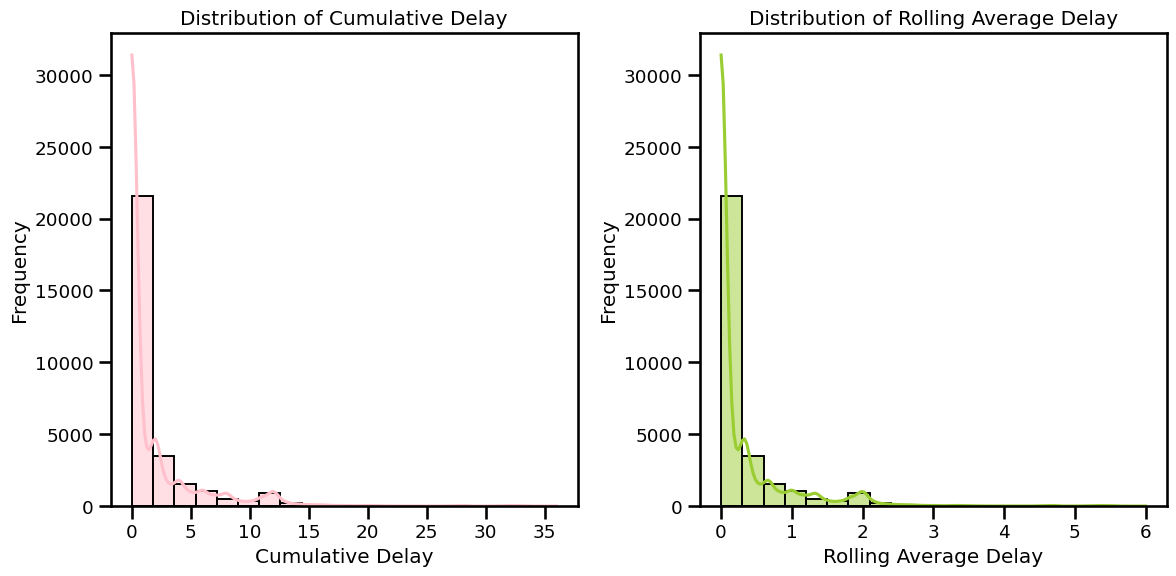

In [ ]:
# Assuming the DataFrame df_with_new_features exists and has 'cumulative_delay' and 'rolling_avg_delay' columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for 'cumulative_delay'
sns.histplot(df['cumulative_delay'], bins=20, color='pink', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Cumulative Delay')
axes[0].set_xlabel('Cumulative Delay')
axes[0].set_ylabel('Frequency')

# Plot for 'rolling_avg_delay'
sns.histplot(df['rolling_avg_delay'], bins=20, color='yellowgreen', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Rolling Average Delay')
axes[1].set_xlabel('Rolling Average Delay')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Remove rows with missing or infinite values in cumulative_delay or rolling_avg_delay
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['cumulative_delay', 'rolling_avg_delay'])

# Test for normality again
from scipy.stats import shapiro

stat, p = shapiro(df_cleaned['cumulative_delay'])
print(f'Shapiro-Wilk Test for Cumulative Delay: p-value={p}')

stat, p = shapiro(df_cleaned['rolling_avg_delay'])
print(f'Shapiro-Wilk Test for Rolling Average Delay: p-value={p}')


Shapiro-Wilk Test for Cumulative Delay: p-value=2.3675561742681973e-125
Shapiro-Wilk Test for Rolling Average Delay: p-value=2.3675561742681973e-125


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29965.
  res = hypotest_fun_out(*samples, **kwds)


#### Test for Normality

The results of the **Shapiro-Wilk test** indicate that both `cumulative_delay` and `rolling_avg_delay` are **not normally distributed**, as the **p-values are extremely small** (p < 0.05). The warning you're seeing (`For N > 5000, computed p-value may not be accurate`) is because the **Shapiro-Wilk test** can become less accurate for very large datasets (in your case, N = 29965).

### Key Interpretation:
- **p-value for cumulative_delay**: 2.367e-125
- **p-value for rolling_avg_delay**: 2.367e-125

Since both p-values are **significantly less than 0.05**, you can conclude that both features are **highly non-normal**.

### Next Steps:
Given the skewness and non-normality of the data, you should now use **non-parametric tests** to assess the relationship between these delay features (`cumulative_delay` and `rolling_avg_delay`) and the target (`default_payment_next_month`).

### Suggested Non-Parametric Tests:
1. **Mann-Whitney U Test**: This test is a non-parametric alternative to the t-test and can be used to compare `cumulative_delay` and `rolling_avg_delay` between the two target groups (defaults vs. no defaults).
   
2. **Kruskal-Wallis Test**: This is a non-parametric alternative to ANOVA and can be used to compare the distributions of delay features across different target groups.

### Interpretation of the Results:
- **Mann-Whitney U Test**: A p-value < 0.05 indicates a significant difference in the distribution of the delay features between defaults and no defaults.
- **Kruskal-Wallis Test**: A p-value < 0.05 indicates that at least one group has a different distribution of the delay feature.





#### Non-Parametric Tests

In [ ]:
# Remove rows with missing or infinite values in cumulative_delay or rolling_avg_delay
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['cumulative_delay', 'rolling_avg_delay'])

# Check the number of rows removed
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")

from scipy.stats import mannwhitneyu

# Mann-Whitney U test for cumulative_delay
u_stat_cumulative, p_value_cumulative = mannwhitneyu(
    df_cleaned[df_cleaned['target'] == 1]['cumulative_delay'],
    df_cleaned[df_cleaned['target'] == 0]['cumulative_delay'],
    alternative='two-sided'
)

# Mann-Whitney U test for rolling_avg_delay
u_stat_rolling, p_value_rolling = mannwhitneyu(
    df_cleaned[df_cleaned['target'] == 1]['rolling_avg_delay'],
    df_cleaned[df_cleaned['target'] == 0]['rolling_avg_delay'],
    alternative='two-sided'
)

# Print the Mann-Whitney U test results
print(f"Mann-Whitney U Test for Cumulative Delay: U-statistic={u_stat_cumulative}, p-value={p_value_cumulative}")
print(f"Mann-Whitney U Test for Rolling Average Delay: U-statistic={u_stat_rolling}, p-value={p_value_rolling}")


Original DataFrame size: (30000, 35)
Cleaned DataFrame size: (29965, 35)
Mann-Whitney U Test for Cumulative Delay: U-statistic=80212456.0, p-value=4.457676218834561e-09
Mann-Whitney U Test for Rolling Average Delay: U-statistic=80212456.0, p-value=4.457676218834561e-09


In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis test for cumulative_delay
kruskal_stat_cumulative, p_value_cumulative = kruskal(
    df_cleaned[df_cleaned['target_numeric'] == 1]['cumulative_delay'],
    df_cleaned[df_cleaned['target_numeric'] == 0]['cumulative_delay']
)

# Kruskal-Wallis test for rolling_avg_delay
kruskal_stat_rolling, p_value_rolling = kruskal(
    df_cleaned[df_cleaned['target_numeric'] == 1]['rolling_avg_delay'],
    df_cleaned[df_cleaned['target_numeric'] == 0]['rolling_avg_delay']
)

# Print the Kruskal-Wallis test results
print(f"Kruskal-Wallis Test for Cumulative Delay: H-statistic={kruskal_stat_cumulative}, p-value={p_value_cumulative}")
print(f"Kruskal-Wallis Test for Rolling Average Delay: H-statistic={kruskal_stat_rolling}, p-value={p_value_rolling}")


Kruskal-Wallis Test for Cumulative Delay: H-statistic=34.41287375810124, p-value=4.457650431479104e-09
Kruskal-Wallis Test for Rolling Average Delay: H-statistic=34.41287375810124, p-value=4.457650431479104e-09


#### Interpretation of Results:

Both the **Mann-Whitney U Test** and the **Kruskal-Wallis Test** for both `cumulative_delay` and `rolling_avg_delay` returned **very small p-values**:

- **Mann-Whitney U Test for Cumulative Delay**: p-value = 4.457676e-09
- **Mann-Whitney U Test for Rolling Average Delay**: p-value = 4.457676e-09
- **Kruskal-Wallis Test for Cumulative Delay**: p-value = 4.457650e-09
- **Kruskal-Wallis Test for Rolling Average Delay**: p-value = 4.457650e-09

### Key Points:
1. **Very Small P-values**: The p-values for all tests are **significantly below 0.05**, which indicates strong evidence that the distribution of `cumulative_delay` and `rolling_avg_delay` differs between the default and non-default groups.
   
2. **Statistical Significance**:
   - Both `cumulative_delay` and `rolling_avg_delay` are **statistically significant** in predicting loan defaults (`default_payment_next_month`), meaning these features provide valuable information to distinguish between defaulting and non-defaulting customers.

3. **U-statistic and H-statistic**:
   - The **Mann-Whitney U-statistic** and **Kruskal-Wallis H-statistic** indicate the magnitude of the test, but the key takeaway is the small p-values, confirming that both delay features are important for distinguishing between defaulting and non-defaulting customers.

### Next Steps:
Given the statistical significance of these features, you can confidently include `cumulative_delay` and `rolling_avg_delay` in your model as key features. They both seem to have a strong relationship with the target variable (`default_payment_next_month`), and using them in a machine learning model should enhance predictive performance.


#### Cumulative Delay Category Feature

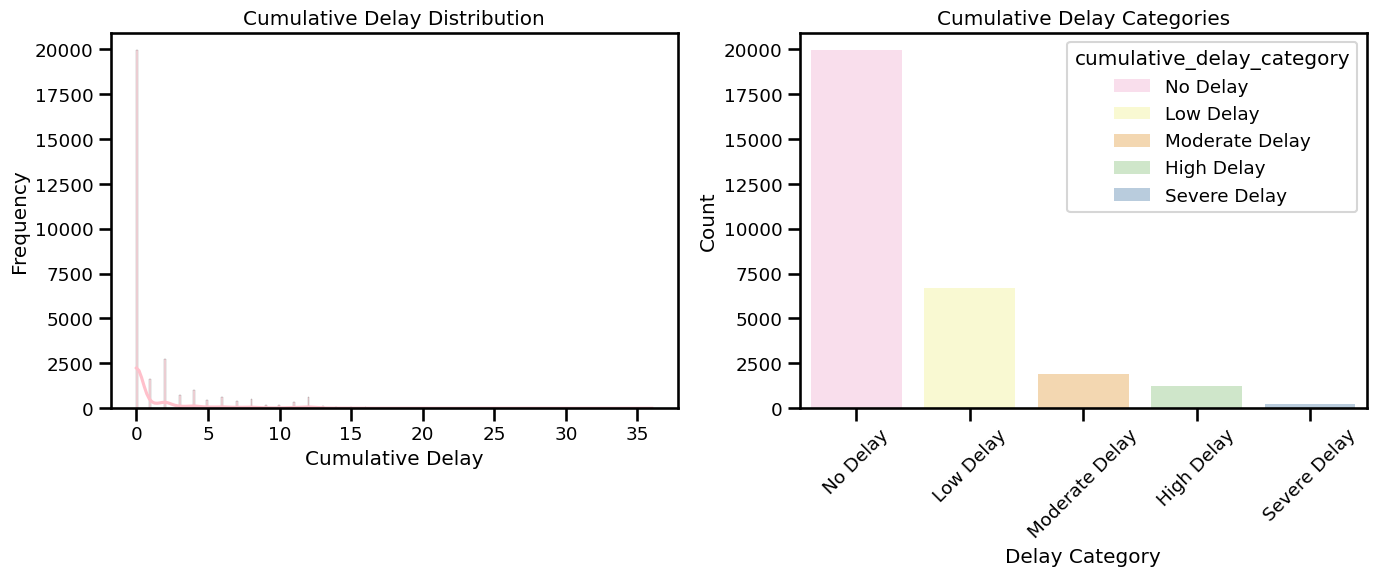

In [ ]:
# Create the cumulative_delay_category using binning
df['cumulative_delay_category'] = pd.cut(df['cumulative_delay'],
                                        bins=[-np.inf, 0, 5, 10, 15, np.inf],
                                        labels=['No Delay', 'Low Delay', 'Moderate Delay', 'High Delay', 'Severe Delay'],
                                        ordered=True)

palette='Pastel1_r'
# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for cumulative_delay (histogram)
sns.histplot(df['cumulative_delay'], kde=True, ax=axes[0], color='pink')
axes[0].set_title('Cumulative Delay Distribution')
axes[0].set_xlabel('Cumulative Delay')
axes[0].set_ylabel('Frequency')

# Plot for cumulative_delay_category (bar plot)
sns.countplot(x=df['cumulative_delay_category'], ax=axes[1],
              hue=df['cumulative_delay_category'], palette=palette)
axes[1].set_title('Cumulative Delay Categories')
axes[1].set_xlabel('Delay Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['cumulative_delay_category'],df['default_payment_next_month'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test: chi2_stat={chi2_stat}, p-value={p_value}')


Chi-Square Test: chi2_stat=41.07445189058464, p-value=2.5940949162023282e-08


#### Chi-Square Test

- **Chi-Square Statistic (chi2_stat)**: 41.074
   - This is the calculated test statistic that measures the difference between the observed and expected frequencies in the contingency table.

- **p-value**: 2.594e-08
   - This p-value is **extremely small** (well below 0.05), which indicates that the association between the `cumulative_delay_category` and `default_payment_next_month` is **statistically significant**.

### Key Takeaways:
1. **Statistically Significant Association**:
   - Since the p-value is much smaller than the standard threshold of **0.05**, there is strong evidence to reject the null hypothesis. This means that the `cumulative_delay_category` is significantly associated with whether or not a customer defaults on their loan.

2. **Practical Implication**:
   - The `cumulative_delay_category` provides useful information for distinguishing between those who are likely to default and those who are not. This feature can add predictive power to your model.

### Next Steps:
- You should consider including `cumulative_delay_category` in your machine learning model as a key feature since it has been shown to have a strong association with loan defaults.
  
If you'd like help with further analysis or incorporating this feature into your model, let me know!

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform ANOVA for cumulative_delay_ordinal vs. target_numeric
model = ols('target ~ C(cumulative_delay_category)', data=df).fit()
anova_results = anova_lm(model)

# Display the ANOVA results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(cumulative_delay_category),4.0,7.075524,1.768881,10.281007,2.566150e-08
Residual,29925.0,5148.694606,0.172053,NaN,NaN


#### ANOVA     |

#### Key Metrics:

- **F-statistic (F)**:
   - The **F-statistic** of **10.28** indicates the ratio of the variance explained by the `cumulative_delay_category` to the variance within the groups (residual variance). A higher F-statistic suggests a larger difference between the group means relative to the variation within groups.

- **p-value (PR(>F))**:
   - The **p-value** is **2.57e-08**, which is significantly below 0.05. This means there is a **statistically significant difference** in the mean of the target (loan default rates) across the categories of `cumulative_delay_category`.

### 3. **Conclusion**:
- The **ANOVA test** shows that there is a **significant relationship** between the `cumulative_delay_category` and the `target`. This means that the different delay categories (No Delay, Low Delay, Moderate Delay, etc.) have significantly different default rates.

### Implication:
The results confirm that the `cumulative_delay_category` is a highly valuable feature for predicting loan defaults. Including this feature in your model should significantly improve its performance in distinguishing between defaulters and non-defaulters.


### Additional Features

In [ ]:
df['delay_age_interaction'] = df['cumulative_delay'] * df['age']
df['delay_education_interaction'] = df['cumulative_delay'] * df['education_woe']  # Using WoE as an example
df['log_cumulative_delay'] = np.log1p(df['cumulative_delay'])  # log(1 + x) to handle zero values
df['sqrt_cumulative_delay'] = np.sqrt(df['cumulative_delay'].clip(lower=0))  # Clip to avoid negatives
df['rolling_avg_delay'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july']].mean(axis=1)
df['severe_delay_flag'] = (df['cumulative_delay'] > 10).astype(int)
df['delay_change'] = df['pay_delay_6_june'] - df['pay_delay_4_april']
df['delay_trend'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].diff(axis=1).mean(axis=1)
df['delay_to_income_ratio'] = df['cumulative_delay'] / df['limit_bal']
df['delay_to_payment_ratio'] = df['cumulative_delay'] / df[['pay_amt_4_april', 'pay_amt_5_may']].mean(axis=1)
df['exp_smooth_delay'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].ewm(span=3, adjust=False).mean(axis=1)
df['days_since_last_payment'] = df['cumulative_delay'] - df[['pay_delay_6_june', 'pay_delay_5_may']].min(axis=1)
weights = [0.5, 0.3, 0.2]  # More weight on recent delays
df['weighted_cumulative_delay'] = (df[['pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']] * weights).sum(axis=1)

In [ ]:
def test_feature_significance(df, target_col):
    # Create a copy of the data
    df_copy = df.copy()

    # Initialize a list to store results
    results = []

    # Apply transformations and test significance

    # 1. Delay-Age Interaction
    df_copy['delay_age_interaction'] = df_copy['cumulative_delay'] * df_copy['age']
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['delay_age_interaction'],
                                df_copy[df_copy[target_col] == 0]['delay_age_interaction'],
                                nan_policy='omit')
    results.append(('delay_age_interaction', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # 2. Delay-Education Interaction
    df_copy['delay_education_interaction'] = df_copy['cumulative_delay'] * df_copy['education_woe']
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['delay_education_interaction'],
                                df_copy[df_copy[target_col] == 0]['delay_education_interaction'],
                                nan_policy='omit')
    results.append(('delay_education_interaction', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # 3. Log of Cumulative Delay
    df_copy['log_cumulative_delay'] = np.log1p(df_copy['cumulative_delay'])
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['log_cumulative_delay'],
                                df_copy[df_copy[target_col] == 0]['log_cumulative_delay'],
                                nan_policy='omit')
    results.append(('log_cumulative_delay', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # 4. Square Root of Cumulative Delay
    df_copy['sqrt_cumulative_delay'] = np.sqrt(df_copy['cumulative_delay'].clip(lower=0))
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['sqrt_cumulative_delay'],
                                df_copy[df_copy[target_col] == 0]['sqrt_cumulative_delay'],
                                nan_policy='omit')
    results.append(('sqrt_cumulative_delay', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # # 5. Rolling Average Delay
    # df_copy['rolling_avg_delay'] = df_copy[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july']].mean(axis=1)
    # t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['rolling_avg_delay'],
    #                             df_copy[df_copy[target_col] == 0]['rolling_avg_delay'],
    #                             nan_policy='omit')
    # results.append(('rolling_avg_delay', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # 6. Severe Delay Flag (Chi-Square Test)
    df_copy['severe_delay_flag'] = (df_copy['cumulative_delay'] > 10).astype(int)
    contingency_table = pd.crosstab(df_copy['severe_delay_flag'], df_copy[target_col])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    results.append(('severe_delay_flag', chi2_stat, p_value, 'Chi-Square' if p_value < 0.05 else 'Not significant'))

    # # 7. Delay Change
    # df_copy['delay_change'] = df_copy['pay_delay_6_june'] - df_copy['pay_delay_4_april']
    # t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['delay_change'],
    #                             df_copy[df_copy[target_col] == 0]['delay_change'],
    #                             nan_policy='omit')
    # results.append(('delay_change', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # # 8. Delay Trend (ANOVA)
    # df_copy['delay_trend'] = df_copy[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].diff(axis=1).mean(axis=1)
    # model = ols(f'{target_col} ~ C(delay_trend)', data=df_copy).fit()
    # anova_results = anova_lm(model)
    # p_value = anova_results['PR(>F)'][0]
    # results.append(('delay_trend', anova_results['F'][0], p_value, 'ANOVA' if p_value < 0.05 else 'Not significant'))

    # 9. Delay to Income Ratio
    df_copy['delay_to_income_ratio'] = df_copy['cumulative_delay'] / df_copy['limit_bal']
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['delay_to_income_ratio'],
                                df_copy[df_copy[target_col] == 0]['delay_to_income_ratio'],
                                nan_policy='omit')
    results.append(('delay_to_income_ratio', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # 10. Delay to Payment Ratio
    df_copy['delay_to_payment_ratio'] = df_copy['cumulative_delay'] / df_copy[['pay_amt_4_april', 'pay_amt_5_may']].mean(axis=1)
    t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['delay_to_payment_ratio'],
                                df_copy[df_copy[target_col] == 0]['delay_to_payment_ratio'],
                                nan_policy='omit')
    results.append(('delay_to_payment_ratio', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # # 11. Exponential Smoothing of Delays
    # df_copy['exp_smooth_delay'] = df_copy[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june']].ewm(span=3, adjust=False).mean(axis=1)
    # t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['exp_smooth_delay'],
    #                             df_copy[df_copy[target_col] == 0]['exp_smooth_delay'],
    #                             nan_policy='omit')
    results.append(('exp_smooth_delay', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # # 12. Days Since Last Payment
    # df_copy['days_since_last_payment'] = df_copy['cumulative_delay'] - df_copy[['pay_delay_6_june', 'pay_delay_5_may']].min(axis=1)
    # t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['days_since_last_payment'],
    #                             df_copy[df_copy[target_col] == 0]['days_since_last_payment'],
    #                             nan_policy='omit')
    # results.append(('days_since_last_payment', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # # 13. Weighted Cumulative Delay
    # weights = [0.5, 0.3, 0.2]  # More weight on recent delays
    # df_copy['weighted_cumulative_delay'] = (df_copy[['pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']] * weights).sum(axis=1)
    # t_stat, p_value = ttest_ind(df_copy[df_copy[target_col] == 1]['weighted_cumulative_delay'],
    #                             df_copy[df_copy[target_col] == 0]['weighted_cumulative_delay'],
    #                             nan_policy='omit')
    # results.append(('weighted_cumulative_delay', t_stat, p_value, 't-test' if p_value < 0.05 else 'Not significant'))

    # Return the results
    return results

# Example usage
results = test_feature_significance(df, 'default_payment_next_month')

# Display the results
for result in results:
    print(f'Feature: {result[0]}, Test Score: {result[1]}, p-value: {result[2]}, Test Type: {result[3]}')


Feature: delay_age_interaction, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: delay_education_interaction, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: log_cumulative_delay, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: sqrt_cumulative_delay, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: severe_delay_flag, Test Score: 4.870464933126927, p-value: 0.027320138920080603, Test Type: Chi-Square
Feature: delay_to_income_ratio, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: delay_to_payment_ratio, Test Score: nan, p-value: nan, Test Type: Not significant
Feature: exp_smooth_delay, Test Score: nan, p-value: nan, Test Type: Not significant


#### Loan Data Utils

In [ ]:
script_content=r'''
# loan_data_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

import json

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

target = 'default_payment_next_month'
# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

# ---------  Sex Column Processing  --------- #
# ---- SEX: Gender (1 = male, 2 = female) ----#

# results in cat.categories = ['Female', 'Male'][0,1]
def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# results in cat.categories = ['Female', 'Male'][2,1] (alphabetically ordered)
def process_sex_column_cat_codes_one_two(df):
    try:
        if 'sex' in df.columns:
            # Convert numeric values to categorical, maintaining original codes
            df['sex'] = df['sex'].astype('category')  # First, ensure the column is categorical

            # Define the categories explicitly and map original values (1: Male, 2: Female)
            df['sex'].cat.set_categories([1, 2], rename=True, inplace=True)  # Set categories as 1, 2
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})  # Replace numeric values with labels

            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# ---------  Marriage Column Processing  --------- #

# ---- MARRIAGE: Marital status (1 = married, 2 = single, 3 = other) ----#

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df

# ---------  Target Column Processing  --------- #

def process_default_payment_column(df):
    try:
        if 'default_payment_next_month' in df.columns:
            # Label the categories
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({0: 'No Default', 1: 'Default'})
            df['default_payment_next_month'] = df['default_payment_next_month'].astype('category')
            logging.info("Default payment column labeled and converted to categorical successfully.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing default payment column: {e}")
    return df


# Convert labels to numeric for modeling
def convert_default_payment_to_numeric(df):
    try:
        if 'default_payment_next_month' in df.columns:
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({'No Default': 0, 'Default': 1}).astype(int)
            logging.info("Default payment column converted back to numeric for modeling.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting default payment column to numeric: {e}")
    return df

# ---------  Pay Delay Column Processing  --------- #

def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

# ---------  Education Column Processing  --------- #

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


#-------- Utility and validation functions first ----------#

def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df


#--------  Load and Preprocess Data  --------- #

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            # df = process_sex_column_cat_codes_one_two(df)
            df = process_marriage_column(df)
            df = process_default_payment_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

#--------  Load Preprocess Split Data  --------- #

def load_preprocess_split_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")

#--------  Plot Categorical Data Functions  --------- #

categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# --------- Custom Transformer for Threshold Classifier --------- #

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=None, threshold=0.5):
        # Default to LogisticRegression if no classifier is provided
        self.base_classifier = base_classifier if base_classifier is not None else LogisticRegression(max_iter=1000)
        self.threshold = threshold

    def fit(self, X, y):
        # Fit the base classifier on the training data
        self.base_classifier.fit(X, y)
        return self

    def predict(self, X):
        # Get the predicted probabilities for class 1 (positive class)
        probas = self.base_classifier.predict_proba(X)[:, 1]
        # Apply the threshold to make class predictions
        return (probas >= self.threshold).astype(int)

    def predict_proba(self, X):
        # Return the predicted probabilities from the base classifier
        return self.base_classifier.predict_proba(X)


#--------  Classification Report Functions  --------- #

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")


# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------  Classification Report Functions for Categories  --------- #

# Function to save classification reports with custom categories
def save_classification_reports_with_categories(reports, filename='classification_reports.json'):
    try:
        # Adjust the keys for the class labels to match your custom categories
        for model, report in reports.items():
            if '0' in report and '1' in report:
                report['No Default'] = report.pop('0')
                report['Default'] = report.pop('1')

        with open(filename, 'w') as json_file:
            json.dump(reports, json_file, indent=4)  # Pretty-printing for clarity
        print(f"Classification reports with categories saved as {filename}")
    except Exception as e:
        print(f"Error saving classification reports: {e}")

# Updated plotting function with category names and annotations
def plot_classification_report_metrics_with_categories(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['No Default', 'No Default', 'No Default', 'Default', 'Default', 'Default'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['No Default']['precision'],
            report['No Default']['recall'],
            report['No Default']['f1-score'],
            report['Default']['precision'],
            report['Default']['recall'],
            report['Default']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------   Plot Selected Features  --------#

def plot_selected_features(selected_features, model_name, figsize=(16,8)):
    features = list(selected_features.keys())
    importances = list(selected_features.values())
    plt.figure(figsize=figsize)
    sns.barplot(x=importances, y=features, hue=importances, palette='viridis')
    plt.title(f'Selected Features and their Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [ ]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [ ]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


#### Feature Engineering Pipeline Script

In [ ]:
script_content = r'''
# feature_engineering_pipeline_utils.py

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import pandas as pd

pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']

delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]


# ------- Outlier Removal Transformer Winsor Robust Returns Pandas DataFrame --------#

class WinsorRobustOutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Apply Winsorization (capping)
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])

        # Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        # Convert back to DataFrame if X was a DataFrame
        if isinstance(X, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

        return X_transformed

# ------- High Risk Delay Feature Transformer -------#

class HighRiskDelayFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'high_risk_delay' feature
        X['high_risk_delay'] = X[self.delay_columns].apply(
            lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                      '6 months delay', '7 months delay', '8 months delay',
                                      '9+ months delay'] for delay in row),
            axis=1
        )

        return X

# ------- Severe Delay Count Transformer -------#

class SevereDelayCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_delay_count' feature
        X['severe_delay_count'] = X[self.delay_columns].apply(
            lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay',
                                                            '5 months delay', '6 months delay',
                                                            '7 months delay', '8 months delay',
                                                            '9+ months delay']),
            axis=1
        )

        return X

# ------- Cumulative Delay Transformer -------#

class AvgPaymentSevereDelaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No parameters to initialize for this transformer

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define severe delay categories
        delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Calculate the average payment for severe delays
        def calculate_avg_payment_for_severe_delays(row):
            total_payment = 0
            severe_delay_months = 0
            for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
                if row[f'pay_delay_{i+4}_{month}'] in delays:
                    total_payment += row[f'pay_amt_{i+4}_{month}']
                    severe_delay_months += 1
            return total_payment / severe_delay_months if severe_delay_months > 0 else 0

        # Apply the function to each row
        X['avg_payment_severe_delays'] = X.apply(calculate_avg_payment_for_severe_delays, axis=1)

        return X


# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        )

        return X


# ------- Severe Delay Payment Ratio Transformer -------#

class SevereDelayPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, scaling_factor=10000):
        self.pay_columns = pay_columns
        self.scaling_factor = scaling_factor

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payment across the specified columns
        X['total_payment'] = X[self.pay_columns].sum(axis=1)

        # Calculate the severe delay payment ratio
        X['severe_delay_payment_ratio'] = X.apply(
            lambda row: (row['severe_delay_count'] / row['total_payment'] * self.scaling_factor)
            if row['total_payment'] > 0 else 0,
            axis=1
        )

        # Drop the temporary 'total_payment' column if desired
        X.drop(columns=['total_payment'], inplace=True)

        return X


# ------- Deferred & Decreasing Payments Transformer -------#

class DeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'deferred_and_decreasing_payments' feature
        X['deferred_and_decreasing_payments'] = X.apply(self._check_deferred_and_decreasing, axis=1)

        return X

    def _check_deferred_and_decreasing(self, row):
        delays = ['1 month delay', '2 months delay', '3 months delay',
                  '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Initialize list to store payments in months with any delay
        delay_payments = []

        # Iterate over the months and collect payments for any delay
        for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
            if row[f'pay_delay_{i+4}_{month}'] in delays:
                delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

        # Check if payments are decreasing over time
        for j in range(1, len(delay_payments)):
            if delay_payments[j] > delay_payments[j-1]:
                return False  # Payments are not consistently decreasing

        return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing


# ------- Severe Deferred & Decreasing Payments Transformer -------#

class SevereDeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_decreasing_payments' feature
        X['severe_deferred_and_decreasing_payments'] = X.apply(self._check_severe_deferred_and_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

        # Return True if both conditions are met
        return deferred and decreasing


# ------- Severe Deferred & Any Decreasing Payments Transformer -------#

class SevereDeferredAndAnyDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_any_decreasing_payments' feature
        X['severe_deferred_and_any_decreasing_payments'] = X.apply(self._check_severe_deferred_and_any_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_any_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are severe deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing (any decrease)
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

        # Return True if both conditions are met
        return deferred and decreasing

# ---------------------------------------------------#
# ---------- Ratio and Interaction Features ---------#
# ---------------------------------------------------#

# ------- Bill To Payment Ratio Transformer -------#

class BillToPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, month):
        self.month = month

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define the column names based on the month
        ratio_column = f'bill_to_payment_ratio_{self.month}'
        bill_column = f'bill_amt_{self.month}'
        pay_column = f'pay_amt_{self.month}'

        # Calculate the bill-to-payment ratio
        X[ratio_column] = X[bill_column] / X[pay_column].replace(0, np.nan)
        X[ratio_column] = X[ratio_column].fillna(0)

        return X

# ------- Total Payments Transformer -------#

class TotalPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payments across the specified columns
        X['total_payments'] = X[self.pay_columns].sum(axis=1)

        return X

# ------- Average Payment Transformer -------#

class AvgPaymentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_payments_column='total_payments', num_months=6):
        self.total_payments_column = total_payments_column
        self.num_months = num_months

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the average payment
        X['avg_payment'] = X[self.total_payments_column] / self.num_months

        return X

# ------- Standard Deviation Transformer -------#

class PaymentStdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the standard deviation of payments across the specified columns
        X['payment_std'] = X[self.pay_columns].std(axis=1)

        return X

# ------- Weighted Payment Sum Transformer -------#

class WeightedPaymentSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, weights=None):
        self.pay_columns = pay_columns
        self.weights = weights if weights is not None else [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]  # Default weights

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the weighted payment sum across the specified columns
        X['weighted_payment_sum'] = (X[self.pay_columns] * self.weights).sum(axis=1)

        # Return the DataFrame with all original columns plus the new feature
        return X



# ------- Debt To Limit Ratio Transformer -------#

class TotalBillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bill_columns):
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total bills across the specified columns
        X['total_bills'] = X[self.bill_columns].sum(axis=1)

        return X


class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
        self.total_bills_column = total_bills_column
        self.limit_bal_column = limit_bal_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Handle cases where limit_bal is zero to avoid division by zero
        epsilon = 1e-10  # Small value to avoid division by zero
        X['debt_to_limit_ratio'] = X[self.total_bills_column] / (X[self.limit_bal_column] + epsilon)

        # Handle infinite values, though this should be rare due to the epsilon
        X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

        return X


# ------- Education & Marriage Interaction Transformer -------#

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)

        return X

# ------- Combined Feature Engineering Transformer for IMBPipeline -------#

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        return X


'''

# Write the script to a file
with open("feature_engineering_pipeline_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_pipeline_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_pipeline_utils
importlib.reload(feature_engineering_pipeline_utils)

from feature_engineering_pipeline_utils import *

Script successfully written to feature_engineering_pipeline_utils.py


In [ ]:
X['education'].astype(str) + '_' + X['marriage'].astype(str)

,0
0,University_Married
1,University_Single
2,University_Single
3,University_Married
4,University_Married
...,...
29995,High School_Married
29996,High School_Single
29997,University_Single
29998,High School_Married
